In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir


In [2]:
# sys.path.append("/Users/weilu/opt/")
# from small_script.myFunctions import *
# %load_ext autoreload
# %autoreload 2

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['figure.figsize'] = (10,5) 
# plt.rcParams['figure.figsize'] = (10,5.625)   # 16:9
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# plt.rcParams['figure.figsize'] = (10*2,6.180*2)    #golden ratio

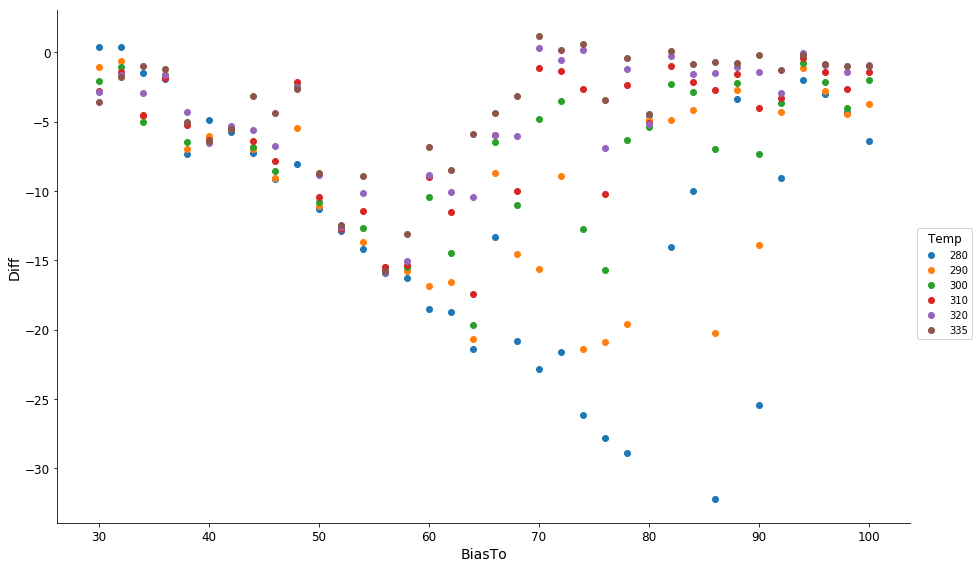

In [227]:
# pre = "/Users/weilu/Research/server/mar_2018/05_week/all_data_folder/sixth_without_directionrerun_2_24_Mar_173616.feather"
# a = pd.read_feather(pre)
data_list = []
read_list = [1]
for i in read_list:
    pre = f"/Users/weilu/Research/server/mar_2018/05_week/all_data_folder/eighthrerun_{i}_27_Mar_010130.feather"
    a = pd.read_feather(pre)
    data_list.append(a)
a = pd.concat(data_list)
# dic = {"T0":280, "T1":300, "T2":320, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}
# dic = {"T0":280, "T1":290, "T2":300, "T3":315, "T4":335, "T5":355, "T6":380, "T7":410, "T8":440, "T9":470, "T10":500, "T11":530}
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}


a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 350").groupby(["BiasTo","Temp"])["DisReal"].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [228]:
# a2 = a

In [234]:
b = a2.query("BiasTo == '32.0'").groupby(["Run", "Temp"])["Step"].count().reset_index()
c = b.pivot(index="Run", columns="Temp", values="Step").reset_index()
c

Temp  Run     280    290    300    310    320    335    350    365    380  \
0       0   112.0   85.0  113.0  247.0  455.0  638.0  650.0  166.0   34.0   
1       1    46.0  128.0  232.0  387.0  521.0  578.0  454.0  122.0   32.0   
2       2   210.0  539.0  611.0  536.0  352.0  190.0   46.0   16.0    NaN   
3       3  1614.0  562.0  228.0   76.0   18.0    2.0    NaN    NaN    NaN   
4       4     NaN    NaN    NaN    2.0    2.0   30.0  218.0  530.0  588.0   
5       5     NaN    NaN    NaN    NaN    2.0   62.0  182.0  528.0  748.0   
6       6     NaN    NaN    NaN    NaN    2.0   28.0  206.0  537.0  543.0   
7       7   132.0  400.0  442.0  470.0  456.0  385.0  175.0   38.0    2.0   
8       8    58.0  194.0  306.0  343.0  401.0  423.0  341.0  137.0  101.0   
9       9   328.0  592.0  568.0  439.0  291.0  160.0   94.0   28.0    NaN   
10     10     NaN    NaN    NaN    NaN    NaN    4.0   42.0  194.0  178.0   
11     11     NaN    NaN    NaN    NaN    NaN    NaN   92.0  204.0  274.0   

Temp    410    440     470  
0       NaN    NaN     NaN  
1       NaN    NaN     NaN  
2       NaN    NaN     NaN  
3       NaN    NaN     NaN  
4     604.0  432.0    94.0  
5     522.0  388.0    68.0  
6     505.0  433.0   246.0  
7       NaN    NaN     NaN  
8     129.0   67.0     NaN  
9       NaN    NaN     NaN  
10    272.0  438.0  1372.0  
11    468.0  742.0   720.0

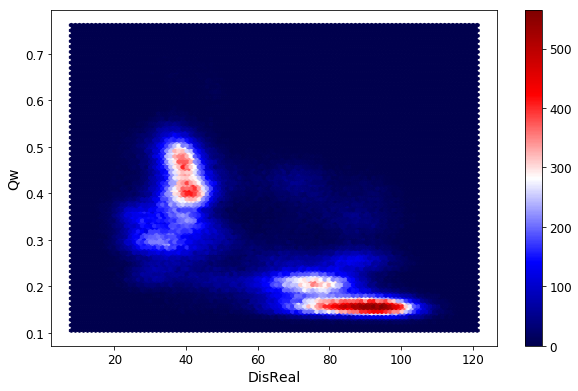

In [239]:
a2.query("Temp < 350 and Temp >290").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

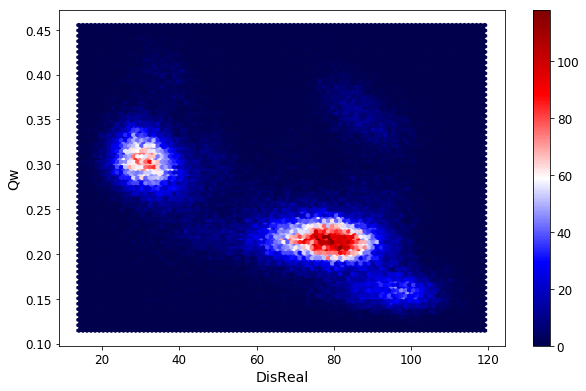

In [233]:
a2.query("Temp < 311").query("z_h6 < -15").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [242]:
a2.query("Temp < 350 and Temp >290").query("z_h6 < -15").query("DisReal < 50").groupby(["BiasTo", "Run"])["Temp"].describe().query("count > 100")

count        mean        std    min    25%    50%    75%    max
BiasTo Run                                                                  
30.0   3     598.0  317.232441  12.951701  300.0  310.0  320.0  335.0  335.0
       6    1489.0  316.282740  12.304929  300.0  310.0  320.0  320.0  335.0
       8    1607.0  316.393902  12.629840  300.0  310.0  320.0  320.0  335.0
       9     921.0  320.993485  12.758883  300.0  310.0  320.0  335.0  335.0
32.0   1    1718.0  320.093132  12.341838  300.0  310.0  320.0  335.0  335.0
34.0   4     527.0  325.436433  10.640122  300.0  320.0  335.0  335.0  335.0
       6    2094.0  314.985673  11.223516  300.0  310.0  310.0  320.0  335.0
       8     504.0  326.220238  10.892074  300.0  320.0  335.0  335.0  335.0
36.0   4     109.0  319.862385  11.596190  300.0  310.0  320.0  335.0  335.0
38.0   1     580.0  316.482759  12.326504  300.0  310.0  310.0  320.0  335.0
       4     494.0  323.825911  12.014953  300.0  320.0  320.0  335.0  335.0
       5    1857.0  314.483037  11.454175  300.0  310.0  310.0  320.0  335.0
       7     911.0  305.784852   7.897964  300.0  300.0  300.0  310.0  335.0
       9     815.0  306.797546   8.338036  300.0  300.0  300.0  310.0  335.0
40.0   0     161.0  327.857143   9.790210  300.0  320.0  335.0  335.0  335.0
       4    1722.0  310.586527  10.613313  300.0  300.0  310.0  320.0  335.0
       9     102.0  329.117647   9.157904  310.0  320.0  335.0  335.0  335.0
       10   1552.0  309.085052   9.519425  300.0  300.0  310.0  310.0  335.0
42.0   4     315.0  329.396825  10.194821  300.0  320.0  335.0  335.0  335.0
44.0   0     859.0  329.930151   8.438438  300.0  320.0  335.0  335.0  335.0
       4     460.0  330.380435   8.363791  300.0  320.0  335.0  335.0  335.0
       7     524.0  314.007634  11.304407  300.0  310.0  310.0  320.0  335.0
46.0   3     958.0  318.366388  12.526603  300.0  310.0  320.0  335.0  335.0
       8    1620.0  313.756173  12.290711  300.0  300.0  310.0  320.0  335.0
       10    860.0  313.761628  11.831969  300.0  300.0  310.0  320.0  335.0
       11    188.0  331.515957   7.049463  310.0  335.0  335.0  335.0  335.0
48.0   0     143.0  328.776224   9.790351  300.0  320.0  335.0  335.0  335.0
       1     105.0  329.571429   8.178134  310.0  320.0  335.0  335.0  335.0
       5     301.0  327.657807  10.420133  300.0  320.0  335.0  335.0  335.0
       6    2076.0  320.074663  11.827341  300.0  310.0  320.0  335.0  335.0
       8     200.0  325.150000  11.218591  300.0  320.0  335.0  335.0  335.0
       10   1008.0  323.983135  11.701463  300.0  320.0  320.0  335.0  335.0
50.0   7     101.0  322.821782   8.044123  310.0  320.0  320.0  335.0  335.0
60.0   9     651.0  311.559140  10.999474  300.0  300.0  310.0  320.0  335.0

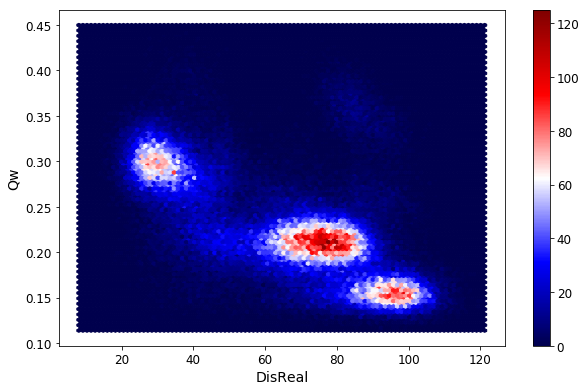

In [240]:
a2.query("Temp < 350 and Temp >290").query("z_h6 < -15").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

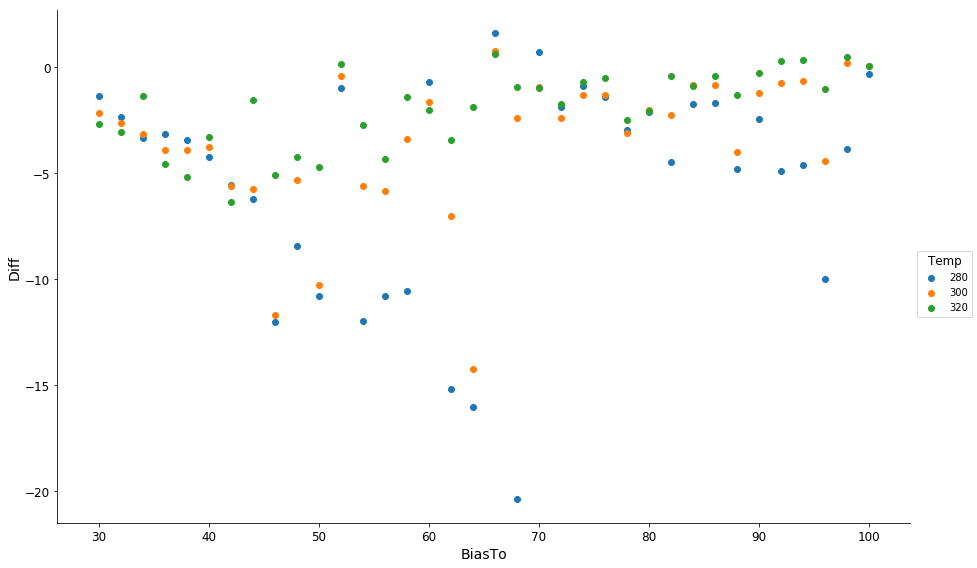

In [230]:
# pre = "/Users/weilu/Research/server/mar_2018/05_week/all_data_folder/sixth_without_directionrerun_2_24_Mar_173616.feather"
# a = pd.read_feather(pre)
data_list = []
read_list = [1]
for i in read_list:
    pre = f"/Users/weilu/Research/server/mar_2018/05_week/all_data_folder/sixth_without_directionrerun_{i}_24_Mar_173616.feather"
    a = pd.read_feather(pre)
    data_list.append(a)
a = pd.concat(data_list)
dic = {"T0":280, "T1":300, "T2":320, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}
# dic = {"T0":280, "T1":290, "T2":300, "T3":315, "T4":335, "T5":355, "T6":380, "T7":410, "T8":440, "T9":470, "T10":500, "T11":530}

a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 350").groupby(["BiasTo","Temp"])["DisReal"].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

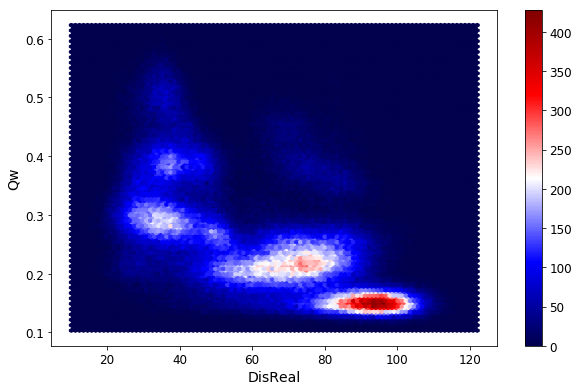

In [238]:
a.query("Temp < 351").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

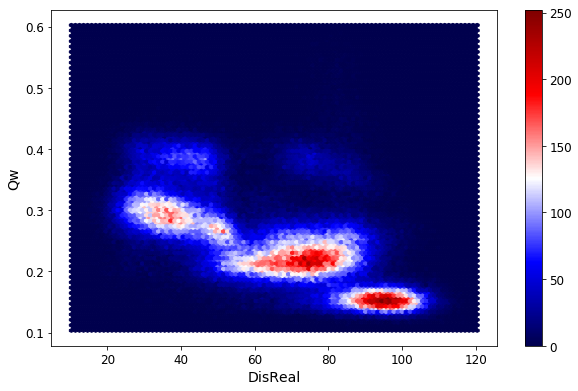

In [232]:
a.query("Temp < 350").query("z_h6 < -15").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

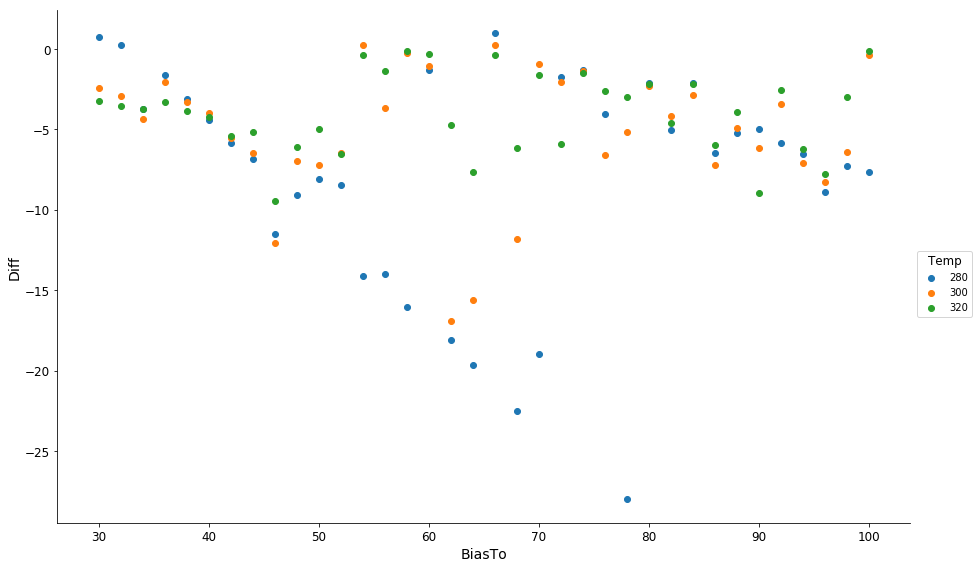

In [134]:
# pre = "/Users/weilu/Research/server/mar_2018/05_week/all_data_folder/sixth_without_directionrerun_2_24_Mar_173616.feather"
# a = pd.read_feather(pre)
data_list = []
read_list = [2, 3]
for i in read_list:
    pre = f"/Users/weilu/Research/server/mar_2018/05_week/all_data_folder/sixth_without_directionrerun_{i}_24_Mar_173616.feather"
    a = pd.read_feather(pre)
    data_list.append(a)
a = pd.concat(data_list)
dic = {"T0":280, "T1":300, "T2":320, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}
# dic = {"T0":280, "T1":290, "T2":300, "T3":315, "T4":335, "T5":355, "T6":380, "T7":410, "T8":440, "T9":470, "T10":500, "T11":530}

a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 350").groupby(["BiasTo","Temp"])["DisReal"].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

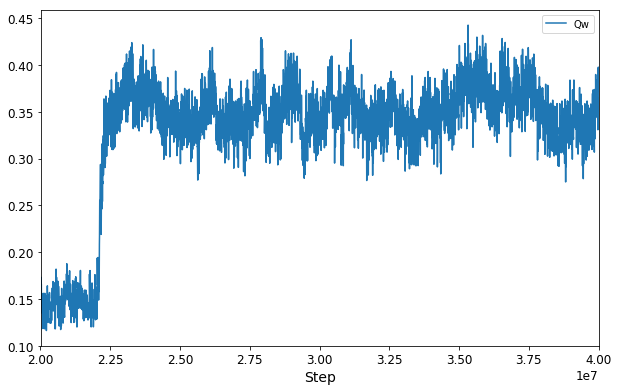

In [136]:
a.query("BiasTo == '100.0' and Run == 3").plot("Step", "Qw")

In [186]:
a.head()

Step  Run  Temp        Qw      Energy    DisReal  z_average  \
0  20004000    0   450  0.206254 -619.470752  80.207905  -4.612869   
1  20004000    1   550  0.138611 -553.489574  93.354921  -8.689609   
2  20004000    2   300  0.183682 -796.267506  82.983558 -11.782003   
3  20004000    3   320  0.197986 -704.897134  88.283600 -16.923122   
4  20004000    4   350  0.111879 -214.185782  84.594534  -8.752363   

   abs_z_average       z_h1      z_h2   ...      Lipid8    Lipid9  \
0      12.927359  -2.363386 -7.768057   ...    0.792020 -0.000005   
1      16.373429   3.304237 -5.360176   ...   -0.000273 -0.000002   
2      18.053009  -1.645715 -7.100718   ...   -0.000131 -0.000007   
3      18.025366 -15.553601 -9.665612   ...   -0.000265  0.002089   
4      17.842948   1.214441 -7.989569   ...   -0.000245 -0.000004   

        Lipid10       Lipid11       Lipid12   Lipid13       Lipid14   Lipid15  \
0 -2.934434e+00  4.032861e-01 -5.304113e-06 -0.566952 -5.284544e-06  0.019059   
1 -2.548089e-10 -1.315296e-08 -9.717139e-11  0.021567  1.333086e-04  0.006905   
2 -2.501337e-12 -9.806774e-09 -4.884703e-10 -0.000098 -1.338247e-05  0.001475   
3 -8.659381e-10  3.116903e-06 -1.522818e-07  0.000015 -6.971731e-08  0.002114   
4 -8.325621e-11 -8.563058e-09 -1.531910e-10  0.003609  2.056685e-05  0.010937   

       TotalE  BiasTo  
0 -631.389924    86.0  
1 -555.467091    86.0  
2 -799.208554    86.0  
3 -704.893331    86.0  
4 -216.087915    86.0  

[5 rows x 43 columns]

In [212]:
tt = a.query("Temp < 300").query("z_h6 < -18 and z_h6 > -22").query("Qw > 0.32 and Qw < 0.35")

In [213]:
sample = tt.sample(5).reset_index(drop=True)
sample["Frame"] = ((sample["Step"] - 2e7*rerun)/4000).astype("int")

In [214]:
sample

Step  Run  Temp        Qw      Energy    DisReal  z_average  \
0  23936000    7   280  0.349851 -890.841157  82.642245  -4.633640   
1  31820000    7   280  0.335043 -885.936910  91.695760  -5.176516   
2  28528000    9   280  0.343392 -872.286452  39.141427 -10.986175   
3  30012000    3   280  0.339241 -850.886158  90.913400  -6.025069   
4  38472000    7   280  0.340792 -900.442255  96.245415  -6.131896   

   abs_z_average      z_h1      z_h2  ...      Lipid9       Lipid10   Lipid11  \
0      12.258963 -1.288810 -7.880999  ...   -0.000004 -3.000425e+00  0.713634   
1      13.529405 -0.415455 -7.429088  ...   -0.000017 -2.871273e+00  0.069065   
2      16.030893 -1.856568 -9.362550  ...    0.010838 -8.567951e-07  0.000013   
3      13.381230 -1.444309 -8.567825  ...   -0.000002 -3.678614e+00  0.397407   
4      13.396890 -1.171224 -8.320076  ...   -0.000013 -3.061873e+00  0.532551   

        Lipid12   Lipid13   Lipid14       Lipid15      TotalE  BiasTo  Frame  
0 -3.923157e-06 -3.869914 -0.000004  7.180338e-03 -908.152990    96.0    984  
1 -1.744586e-05  0.118168 -0.000017 -2.746210e-06 -899.443101    96.0   2955  
2 -2.830080e-07 -0.103851 -0.000951 -1.465050e-02 -879.655508    48.0   2132  
3 -2.195015e-06  0.056652 -0.000002 -7.899247e-07 -863.491553   100.0   2503  
4 -1.330337e-05 -0.717554 -0.000011 -4.358163e-06 -912.522389    96.0   4618  

[5 rows x 44 columns]

In [215]:
sample.to_csv("/Users/weilu/Research/server/mar_2018/05_week/pick_structure/sample.csv")

In [208]:
sample = pd.read_csv("/Users/weilu/Research/server/mar_2018/05_week/pick_structure/sample.csv", index_col=0)

In [209]:
rerun = 1
for index, row in sample.iterrows():
    BiasTo = row["BiasTo"]
    Run = row["Run"]
    Frame = row["Frame"]
    print(BiasTo, Run, Frame)

100.0 3.0 2918.0
100.0 3.0 2529.0
74.0 5.0 4612.0
96.0 7.0 791.0
30.0 3.0 2080.0


In [144]:
a.query("Temp < 350").query("z_h6 < -17 and z_h6 > -23").query("Qw > 0.3 and Qw < 0.35").groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 1000")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
100.0  3    1656.0  93.629269  4.706767  76.986940  90.599768  93.716686   
86.0   4    1035.0  80.677677  5.049414  67.440020  77.286260  80.542389   
96.0   7    1306.0  89.404868  5.205182  72.466161  85.733486  89.484323   

                  75%         max  
BiasTo Run                         
100.0  3    96.972653  108.615934  
86.0   4    83.999671   98.610026  
96.0   7    93.163184  105.000095

In [150]:
a.query("Temp < 350").query("z_h6 < -17 and z_h6 > -23").query("Qw > 0.28").groupby(["BiasTo", "Run"])["z_h1"].describe().query("count > 1000")

count      mean       std       min       25%       50%  \
BiasTo Run                                                             
100.0  3    3582.0 -0.809309  1.193747 -5.084776 -1.611045 -0.811091   
30.0   7    1198.0 -1.198148  1.329359 -6.588683 -2.054364 -1.204575   
44.0   10   2031.0 -1.397372  1.427239 -6.693171 -2.312912 -1.398333   
48.0   2    1756.0 -1.080469  1.275058 -5.238417 -1.938384 -1.080786   
       9    1585.0 -1.382473  1.422483 -5.623486 -2.323642 -1.331565   
50.0   4    3334.0 -0.932984  1.245161 -5.308839 -1.792202 -0.924487   
62.0   3    3290.0 -1.654197  1.373956 -6.976918 -2.548250 -1.642659   
       9    1624.0 -0.792221  1.283074 -5.186271 -1.664563 -0.829984   
64.0   0    3410.0 -1.780691  1.458445 -7.361420 -2.715966 -1.804138   
       1    1812.0 -1.731316  1.446969 -6.612046 -2.639863 -1.727722   
70.0   7    2683.0 -0.787362  1.275127 -5.735921 -1.656892 -0.808629   
       8    1514.0 -0.821122  1.240182 -4.497828 -1.650436 -0.816890   
72.0   3    2929.0 -0.831174  1.225369 -5.430507 -1.641391 -0.841505   
78.0   6    3563.0 -0.760710  1.230801 -5.742834 -1.591023 -0.756178   
82.0   7    4045.0 -0.750286  1.210334 -5.079661 -1.580159 -0.761997   
86.0   4    2636.0 -0.692834  1.288899 -5.403161 -1.572479 -0.701439   
96.0   7    3931.0 -0.736867  1.193627 -5.344234 -1.565545 -0.757907   

                 75%       max  
BiasTo Run                      
100.0  3   -0.009133  3.982028  
30.0   7   -0.376215  3.091392  
44.0   10  -0.471651  3.959054  
48.0   2   -0.233160  2.956842  
       9   -0.432215  4.431177  
50.0   4   -0.102666  3.196587  
62.0   3   -0.756340  3.313772  
       9    0.124361  3.187998  
64.0   0   -0.822055  3.872334  
       1   -0.775562  3.692038  
70.0   7    0.032312  4.345180  
       8    0.002291  3.915513  
72.0   3   -0.003599  3.973727  
78.0   6    0.080729  4.676244  
82.0   7    0.054213  4.431401  
86.0   4    0.161843  4.130886  
96.0   7    0.047433  4.257967

In [141]:
a.query("Temp < 350").query("z_h6 < -17 and z_h6 > -23").query("Qw > 0.28").groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 1000")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
100.0  3    3582.0  90.957297  5.505279  72.894318  87.100210  91.050965   
30.0   7    1198.0  25.234499  3.649093  13.874641  22.778209  25.158429   
44.0   10   2031.0  39.532725  3.501071  25.035786  37.324525  39.652903   
48.0   2    1756.0  49.575133  5.533741  33.461367  45.854930  49.491199   
       9    1585.0  40.954041  3.811719  26.908692  38.531475  41.096601   
50.0   4    3334.0  50.662729  5.202447  32.842353  47.180181  50.524942   
62.0   3    3290.0  46.959030  3.427134  31.945995  44.621264  46.990054   
       9    1624.0  61.629319  5.206280  44.714769  58.140141  61.605288   
64.0   0    3410.0  48.013830  3.483652  36.185571  45.659569  48.089345   
       1    1812.0  48.459116  3.661929  37.288813  45.970360  48.421099   
70.0   7    2683.0  67.684627  4.730165  52.047911  64.437116  67.594962   
       8    1514.0  67.519641  4.893384  50.575174  64.318939  67.659563   
72.0   3    2929.0  69.085444  4.643538  51.921451  66.008720  69.055250   
78.0   6    3563.0  73.492298  4.584222  59.291399  70.428667  73.532838   
82.0   7    4045.0  75.659387  4.553806  57.036619  72.545992  75.740120   
86.0   4    2636.0  79.273987  5.209143  60.640230  75.882861  79.119036   
96.0   7    3931.0  86.662887  5.359602  69.274336  82.797078  86.357414   

                  75%         max  
BiasTo Run                         
100.0  3    94.850561  108.615934  
30.0   7    27.727921   36.250241  
44.0   10   41.842713   50.346909  
48.0   2    53.437830   66.051340  
       9    43.509647   51.661591  
50.0   4    54.222810   69.133935  
62.0   3    49.302193   57.663219  
       9    65.241330   78.386951  
64.0   0    50.352127   59.248539  
       1    50.865115   62.369399  
70.0   7    70.883405   83.007057  
       8    70.759667   84.899860  
72.0   3    72.230048   85.657281  
78.0   6    76.637347   93.343187  
82.0   7    78.788748   91.901869  
86.0   4    82.683464   98.610026  
96.0   7    90.415473  105.000095

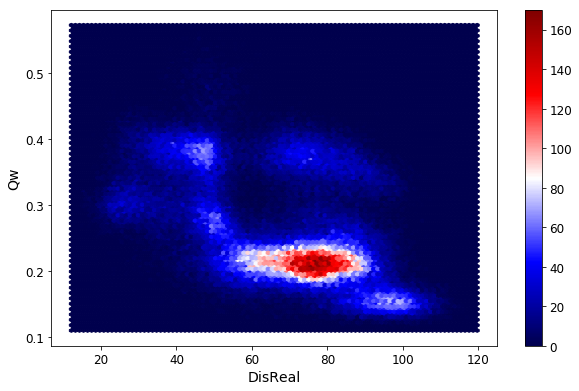

In [121]:
a.query("Temp < 350").query("z_h6 < -15 and z_h6 > -25").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

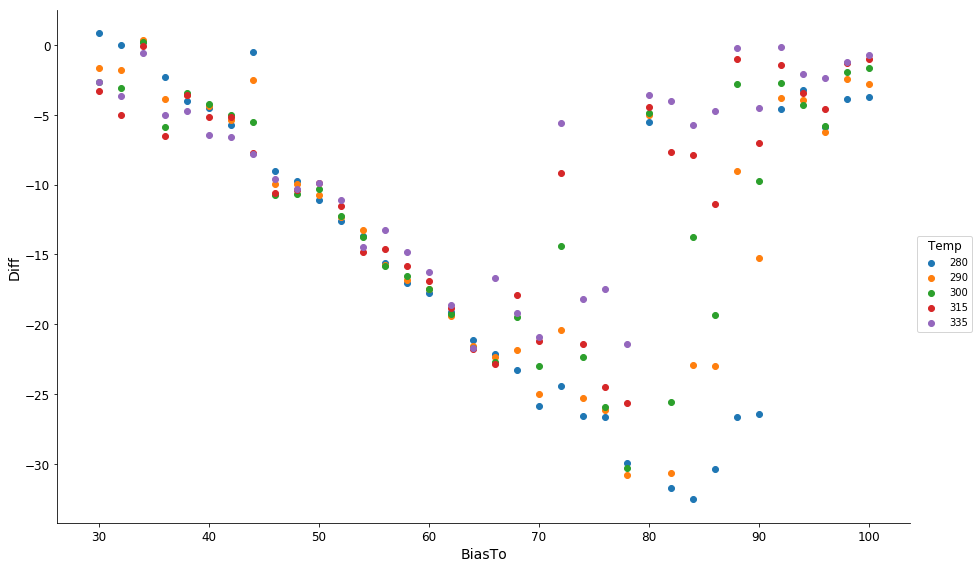

In [54]:
pre = "/Users/weilu/Research/server/mar_2018/05_week/all_data_folder/seventhrerun_1_24_Mar_172933.feather"
a = pd.read_feather(pre)
# dic = {"T0":280, "T1":300, "T2":320, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}
dic = {"T0":280, "T1":290, "T2":300, "T3":315, "T4":335, "T5":355, "T6":380, "T7":410, "T8":440, "T9":470, "T10":500, "T11":530}

a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 350").groupby(["BiasTo","Temp"])["DisReal"].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [61]:
a.query("Temp < 350").query("DisReal > 60").query("Qw > 0.3").groupby(["BiasTo", "Run"])["Temp"].describe().query("count > 100")

count        mean        std    min    25%    50%    75%    max
BiasTo Run                                                                  
56.0   11    138.0  330.362319   8.471457  315.0  335.0  335.0  335.0  335.0
68.0   0    1071.0  309.407096  15.325091  280.0  300.0  315.0  315.0  335.0
       10    152.0  314.506579  14.958661  290.0  300.0  315.0  335.0  335.0
70.0   6    1124.0  310.911922  15.459431  280.0  300.0  315.0  315.0  335.0
72.0   2    2398.0  310.152210  16.905705  280.0  300.0  315.0  315.0  335.0
       5    2235.0  312.689038  17.300324  280.0  300.0  315.0  335.0  335.0
74.0   10   1420.0  311.577465  14.871223  280.0  300.0  315.0  315.0  335.0
76.0   1     194.0  321.494845  16.883707  280.0  315.0  335.0  335.0  335.0
       4     406.0  287.807882  11.010547  280.0  280.0  280.0  290.0  335.0
78.0   8     579.0  314.309154  11.581191  280.0  315.0  315.0  315.0  335.0
80.0   3    2484.0  285.154992   7.790949  280.0  280.0  280.0  290.0  315.0
       9     488.0  301.383197  16.857376  280.0  290.0  300.0  315.0  335.0
       10    115.0  309.086957  17.277186  280.0  300.0  300.0  315.0  335.0
       11    881.0  297.009081  14.331463  280.0  290.0  290.0  300.0  335.0
82.0   4     289.0  326.712803  11.192315  290.0  315.0  335.0  335.0  335.0
84.0   0    1606.0  312.546700  17.151224  280.0  300.0  315.0  335.0  335.0
       9    1809.0  313.383085  16.749810  280.0  300.0  315.0  335.0  335.0
       11   2013.0  313.184302  16.737338  280.0  300.0  315.0  335.0  335.0
86.0   10    817.0  313.145655  15.636639  280.0  300.0  315.0  335.0  335.0
       11   2446.0  300.239166  13.877717  280.0  290.0  300.0  315.0  335.0
88.0   2     288.0  299.687500  11.272963  280.0  290.0  300.0  300.0  335.0
       5     209.0  283.157895   5.596956  280.0  280.0  280.0  290.0  300.0
90.0   2    2488.0  290.918408  10.066654  280.0  280.0  290.0  300.0  335.0
       4    1915.0  308.023499  14.811493  280.0  300.0  315.0  315.0  335.0
       7    2465.0  304.659229  13.537522  280.0  300.0  300.0  315.0  335.0
94.0   4    1228.0  287.923453   9.088661  280.0  280.0  290.0  290.0  335.0
       7    2486.0  285.156879   7.412503  280.0  280.0  280.0  290.0  315.0
96.0   6    1188.0  283.590067   6.082372  280.0  280.0  280.0  290.0  315.0
       10    667.0  291.919040  12.014982  280.0  280.0  290.0  300.0  335.0
98.0   0    2478.0  281.824052   4.479590  280.0  280.0  280.0  280.0  315.0
       1     138.0  296.775362  12.109608  280.0  290.0  290.0  300.0  335.0

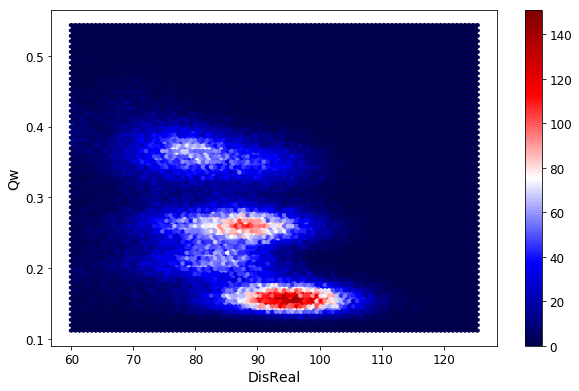

In [57]:
a.query("Temp < 350").query("DisReal > 60").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

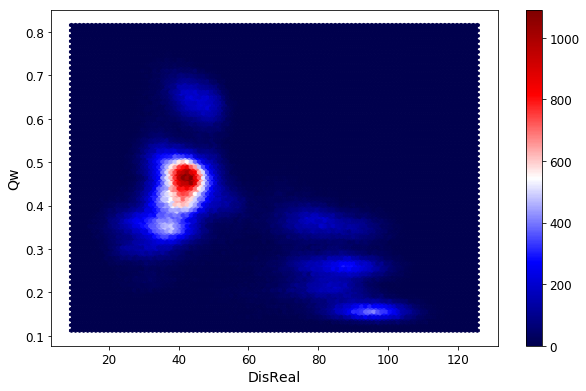

In [55]:
a.query("Temp < 350").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [50]:
b = a.query("BiasTo == '32.0'").groupby(["Run", "Temp"])["Step"].count().reset_index()
c = b.pivot(index="Run", columns="Temp", values="Step").reset_index()
c

Temp  Run     280    290    300    315     335     355    380    410    440  \
0       0     NaN    2.0   10.0  172.0   658.0  1198.0  330.0  116.0   14.0   
1       1    12.0   52.0  116.0  367.0  1023.0   617.0  131.0  105.0   21.0   
2       2     NaN    NaN    NaN    NaN    28.0    58.0  256.0  284.0  552.0   
3       3   348.0  910.0  782.0  380.0    76.0     4.0    NaN    NaN    NaN   
4       4     NaN    NaN    NaN    NaN     NaN     NaN    NaN   63.0  125.0   
5       5  1810.0  496.0  172.0   22.0     NaN     NaN    NaN    NaN    NaN   
6       6     NaN    NaN    NaN    NaN     NaN     2.0   32.0  150.0  442.0   
7       7   142.0  444.0  638.0  927.0   307.0    42.0    NaN    NaN    NaN   
8       8   188.0  596.0  782.0  622.0   258.0    52.0    2.0    NaN    NaN   
9       9     NaN    NaN    NaN   10.0    74.0   134.0  694.0  601.0  509.0   
10     10     NaN    NaN    NaN    NaN    36.0   263.0  479.0  526.0  338.0   
11     11     NaN    NaN    NaN    NaN    40.0   130.0  576.0  655.0  499.0   

Temp    470    500     530  
0       NaN    NaN     NaN  
1       5.0   29.0    22.0  
2     600.0  332.0   390.0  
3       NaN    NaN     NaN  
4     363.0  855.0  1094.0  
5       NaN    NaN     NaN  
6     666.0  566.0   642.0  
7       NaN    NaN     NaN  
8       NaN    NaN     NaN  
9     261.0  169.0    48.0  
10    328.0  422.0   108.0  
11    277.0  127.0   196.0

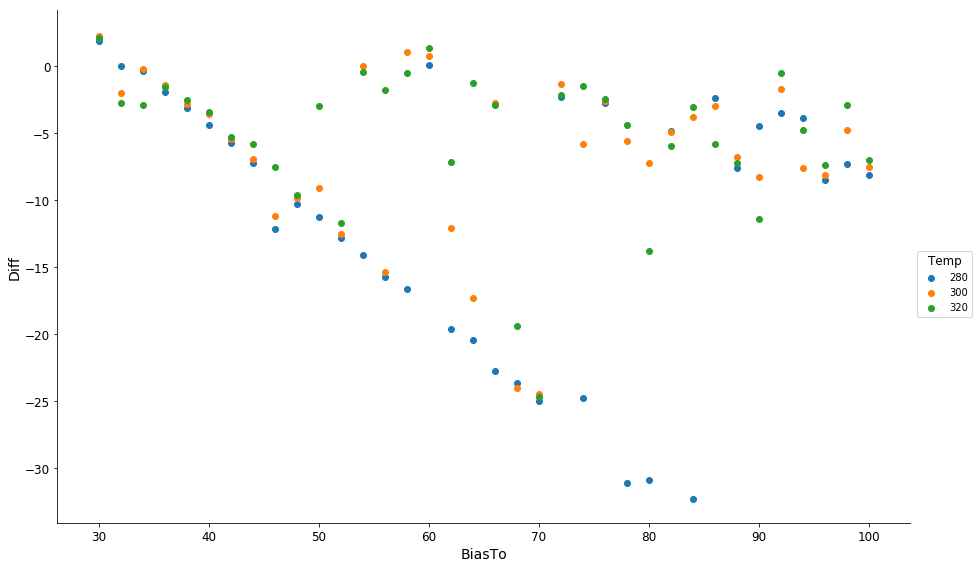

In [62]:
pre = "/Users/weilu/Research/server/mar_2018/05_week/all_data_folder/sixth_without_directionrerun_7_24_Mar_173616.feather"
a = pd.read_feather(pre)
dic = {"T0":280, "T1":300, "T2":320, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 350").groupby(["BiasTo","Temp"])["DisReal"].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [116]:
a.query("Temp == 320").query("BiasTo == '80.0'").groupby("Run")["DisReal"].describe()

count       mean        std        min        25%        50%        75%  \
Run                                                                             
0     188.0  74.319512   4.532707  59.764892  71.686912  74.338895  77.419183   
2     230.0  80.745922   5.471277  65.818295  76.808106  80.522906  84.320701   
3      22.0  80.845034   5.829521  64.860066  79.433753  81.575872  84.594073   
5      80.0  81.547880   5.405796  69.636030  76.287043  81.954448  85.029814   
7     382.0  79.957393   6.001215  63.738814  75.928693  79.907387  84.128806   
9     136.0  83.798942   6.235443  68.517318  80.261239  83.747303  87.590655   
11   1462.0  56.563500  10.532152  38.549880  49.295276  53.484513  60.007984   

           max  
Run             
0    86.503259  
2    95.021592  
3    89.177140  
5    93.164336  
7    97.140990  
9    98.919631  
11   86.729866

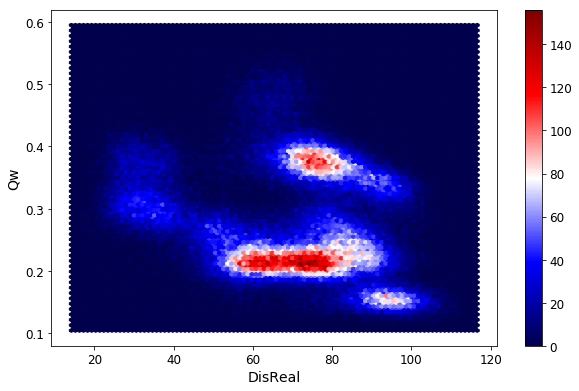

In [75]:
a.query("Temp < 350").query("z_h6 < -10").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

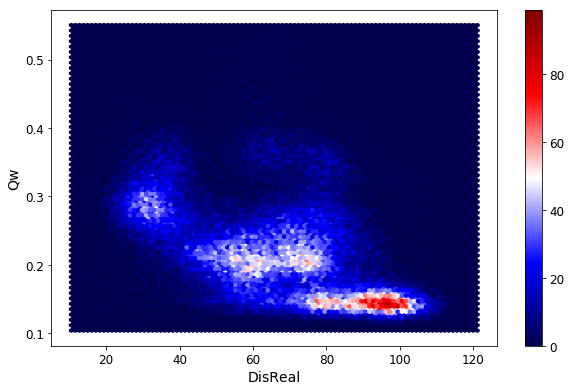

In [86]:
a.query("Temp == 350").query("z_h6 < -10").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [87]:
a.query("Temp == 350").query("z_h6 < -10").query("DisReal < 40").groupby(["BiasTo", "Run"])["Temp"].describe().query("count > 100")

count   mean  std    min    25%    50%    75%    max
BiasTo Run                                                       
30.0   3     446.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
32.0   1     145.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       2     345.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       3     554.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       6     373.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       9     850.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
34.0   0    1200.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       7     741.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       8     264.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
36.0   1     997.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       3     475.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
38.0   1     921.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       5     129.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
40.0   0     846.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       2     332.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
42.0   6    1497.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
44.0   7     117.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       8     218.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
46.0   3     122.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0
       4     191.0  350.0  0.0  350.0  350.0  350.0  350.0  350.0

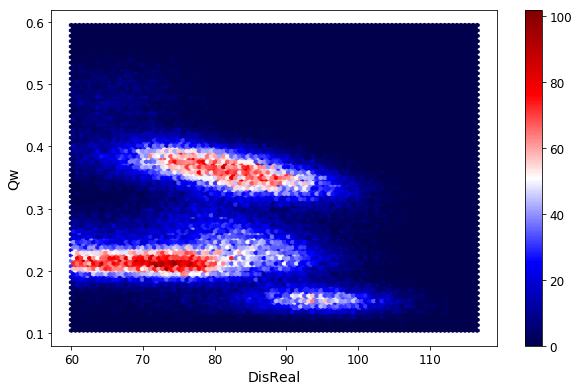

In [64]:
a.query("Temp < 350").query("DisReal > 60").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

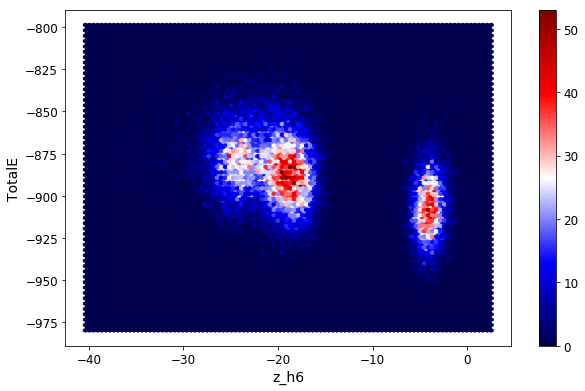

In [73]:
a.query("Temp == 280").query("DisReal > 60").plot.hexbin("z_h6", "TotalE", cmap="seismic", sharex=False)

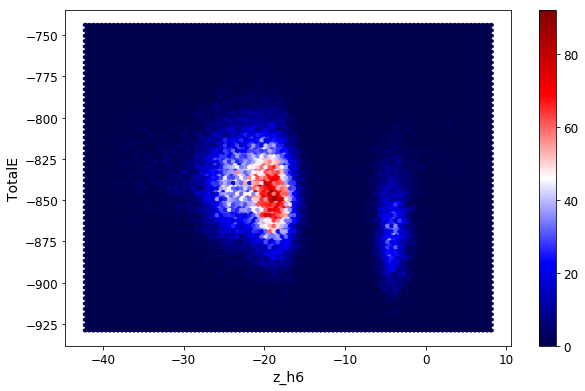

In [72]:
a.query("Temp == 300").query("DisReal > 60").plot.hexbin("z_h6", "TotalE", cmap="seismic", sharex=False)

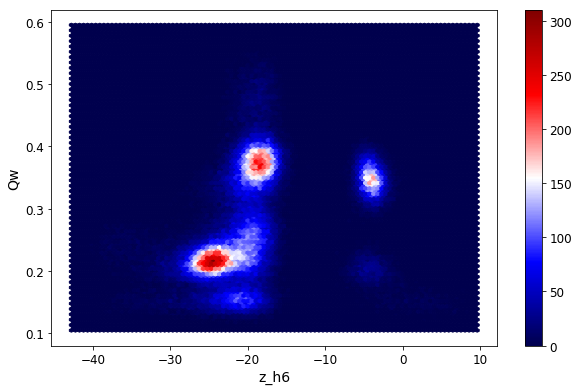

In [66]:
a.query("Temp < 350").query("DisReal > 60").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

In [67]:
a.query("Temp < 350").query("DisReal > 60").query("z_h6 > -10").groupby(["BiasTo", "Run"])["Temp"].describe().query("count > 100")

count        mean        std    min    25%    50%    75%    max
BiasTo Run                                                                  
74.0   4    2291.0  305.438673  13.134077  280.0  300.0  300.0  320.0  320.0
84.0   0    2470.0  302.558704   9.245077  280.0  300.0  300.0  300.0  320.0
86.0   3    2496.0  292.692308  13.747037  280.0  280.0  300.0  300.0  320.0
       10   2426.0  291.376752  12.365593  280.0  280.0  300.0  300.0  320.0
90.0   3    2500.0  284.080000   8.599022  280.0  280.0  280.0  280.0  320.0
92.0   11    263.0  316.045627   9.056113  280.0  320.0  320.0  320.0  320.0
94.0   2    2500.0  280.912000   4.323856  280.0  280.0  280.0  280.0  320.0
       5     451.0  312.594235   9.940349  280.0  300.0  320.0  320.0  320.0

In [85]:
b = a.query("BiasTo == '32.0'").groupby(["Run", "Temp"])["Step"].count().reset_index()
c = b.pivot(index="Run", columns="Temp", values="Step").reset_index()
c

Temp  Run     280    300    320    350    375    400    450    500    550  \
0       0  2080.0  370.0   50.0    NaN    NaN    NaN    NaN    NaN    NaN   
1       1     NaN    NaN   28.0  185.0  443.0  491.0  329.0  576.0  270.0   
2       2   198.0  946.0  964.0  354.0   38.0    NaN    NaN    NaN    NaN   
3       3     NaN   62.0   94.0  585.0  907.0  534.0  318.0    NaN    NaN   
4       4     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   78.0   
5       5     NaN    NaN    NaN  100.0  272.0  633.0  825.0  371.0  135.0   
6       6   200.0  956.0  870.0  383.0   75.0   16.0    NaN    NaN    NaN   
7       7     NaN    NaN    NaN    NaN    NaN    2.0  230.0   57.0  509.0   
8       8     NaN    NaN    NaN    NaN    NaN    NaN   54.0  334.0  738.0   
9       9    22.0  166.0  494.0  893.0  649.0  276.0    NaN    NaN    NaN   
10     10     NaN    NaN    NaN    NaN  116.0  548.0  222.0  729.0  565.0   
11     11     NaN    NaN    NaN    NaN    NaN    NaN  522.0  433.0  205.0   

Temp    600     650    700  
0       NaN     NaN    NaN  
1     178.0     NaN    NaN  
2       NaN     NaN    NaN  
3       NaN     NaN    NaN  
4     546.0  1222.0  654.0  
5     103.0     3.0   58.0  
6       NaN     NaN    NaN  
7     724.0   244.0  734.0  
8     352.0   588.0  434.0  
9       NaN     NaN    NaN  
10    312.0     8.0    NaN  
11    285.0   435.0  620.0

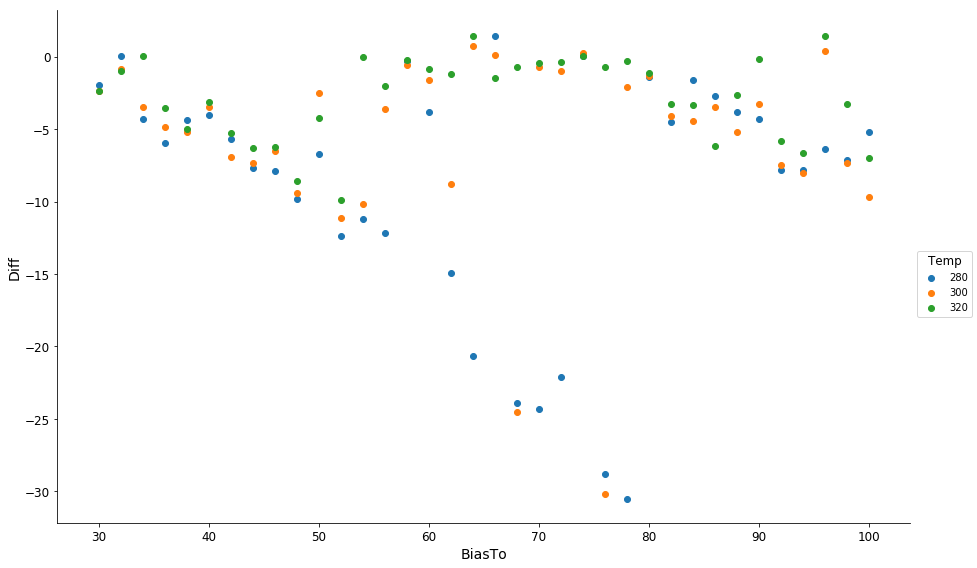

In [4]:
pre = "/Users/weilu/Research/server/mar_2018/04_week/all_data_folder/sixth_without_directionrerun_3_23_Mar_134412.feather"
a = pd.read_feather(pre)
dic = {"T0":280, "T1":300, "T2":320, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 350").groupby(["BiasTo","Temp"])["DisReal"].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [44]:
b = a.query("BiasTo == '32.0'").groupby(["Run", "Temp"])["Step"].count().reset_index()
c = b.pivot(index="Run", columns="Temp", values="Step").reset_index()
c

Temp  Run     280    300    320    350    375     400     450    500    550  \
0       0     NaN    NaN    NaN    NaN    NaN     NaN     NaN  142.0  840.0   
1       1   132.0  172.0  318.0  615.0  451.0   213.0   307.0  292.0    NaN   
2       2   108.0  191.0  425.0  889.0  737.0   150.0     NaN    NaN    NaN   
3       3     NaN    NaN    NaN    NaN    NaN     NaN     NaN    NaN  360.0   
4       4     NaN    NaN    NaN    NaN    NaN     NaN     NaN  172.0  542.0   
5       5     NaN    NaN    NaN    NaN   30.0   282.0  1340.0  768.0   80.0   
6       6    26.0  113.0   77.0  279.0  853.0  1152.0     NaN    NaN    NaN   
7       7   326.0  762.0  732.0  449.0  181.0    50.0     NaN    NaN    NaN   
8       8     NaN    NaN    NaN    NaN    NaN     NaN     NaN    NaN  444.0   
9       9  1436.0  778.0  264.0   22.0    NaN     NaN     NaN    NaN    NaN   
10     10   472.0  484.0  684.0  220.0  162.0    68.0   196.0  214.0    NaN   
11     11     NaN    NaN    NaN   26.0   86.0   585.0   657.0  912.0  234.0   

Temp     600    650    700  
0      268.0  434.0  816.0  
1        NaN    NaN    NaN  
2        NaN    NaN    NaN  
3      536.0  814.0  790.0  
4      433.0  607.0  746.0  
5        NaN    NaN    NaN  
6        NaN    NaN    NaN  
7        NaN    NaN    NaN  
8     1263.0  645.0  148.0  
9        NaN    NaN    NaN  
10       NaN    NaN    NaN  
11       NaN    NaN    NaN

In [45]:
b = a.query("BiasTo == '32.0'").groupby(["Run", "Temp"])["Step"].count().reset_index()
c = b.pivot(index="Temp", columns="Run", values="Step").reset_index()
c

Run  Temp      0      1      2      3      4       5       6      7       8  \
0     280    NaN  132.0  108.0    NaN    NaN     NaN    26.0  326.0     NaN   
1     300    NaN  172.0  191.0    NaN    NaN     NaN   113.0  762.0     NaN   
2     320    NaN  318.0  425.0    NaN    NaN     NaN    77.0  732.0     NaN   
3     350    NaN  615.0  889.0    NaN    NaN     NaN   279.0  449.0     NaN   
4     375    NaN  451.0  737.0    NaN    NaN    30.0   853.0  181.0     NaN   
5     400    NaN  213.0  150.0    NaN    NaN   282.0  1152.0   50.0     NaN   
6     450    NaN  307.0    NaN    NaN    NaN  1340.0     NaN    NaN     NaN   
7     500  142.0  292.0    NaN    NaN  172.0   768.0     NaN    NaN     NaN   
8     550  840.0    NaN    NaN  360.0  542.0    80.0     NaN    NaN   444.0   
9     600  268.0    NaN    NaN  536.0  433.0     NaN     NaN    NaN  1263.0   
10    650  434.0    NaN    NaN  814.0  607.0     NaN     NaN    NaN   645.0   
11    700  816.0    NaN    NaN  790.0  746.0     NaN     NaN    NaN   148.0   

Run       9     10     11  
0    1436.0  472.0    NaN  
1     778.0  484.0    NaN  
2     264.0  684.0    NaN  
3      22.0  220.0   26.0  
4       NaN  162.0   86.0  
5       NaN   68.0  585.0  
6       NaN  196.0  657.0  
7       NaN  214.0  912.0  
8       NaN    NaN  234.0  
9       NaN    NaN    NaN  
10      NaN    NaN    NaN  
11      NaN    NaN    NaN

In [47]:
b = a.query("BiasTo == '32.0'").groupby(["Run", "Temp"])["Qw"].mean().reset_index()
c = b.pivot(index="Run", columns="Temp", values="Qw").reset_index()
c

Temp  Run       280       300       320       350       375       400  \
0       0       NaN       NaN       NaN       NaN       NaN       NaN   
1       1  0.317150  0.306979  0.295443  0.282764  0.263921  0.200323   
2       2  0.316266  0.310629  0.291406  0.279065  0.266527  0.252273   
3       3       NaN       NaN       NaN       NaN       NaN       NaN   
4       4       NaN       NaN       NaN       NaN       NaN       NaN   
5       5       NaN       NaN       NaN       NaN  0.196780  0.205003   
6       6  0.369046  0.378771  0.345849  0.295368  0.289417  0.274946   
7       7  0.369130  0.346611  0.335522  0.287119  0.247676  0.164108   
8       8       NaN       NaN       NaN       NaN       NaN       NaN   
9       9  0.428857  0.416252  0.409781  0.408021       NaN       NaN   
10     10  0.417070  0.405144  0.398982  0.381425  0.322441  0.252947   
11     11       NaN       NaN       NaN  0.207199  0.198596  0.167276   

Temp       450       500       550       600       650       700  
0          NaN  0.128650  0.119313  0.111797  0.100229  0.100690  
1     0.133321  0.156471       NaN       NaN       NaN       NaN  
2          NaN       NaN       NaN       NaN       NaN       NaN  
3          NaN       NaN  0.138813  0.114386  0.105812  0.091605  
4          NaN  0.135497  0.149448  0.132947  0.114031  0.096992  
5     0.187468  0.186461  0.169197       NaN       NaN       NaN  
6          NaN       NaN       NaN       NaN       NaN       NaN  
7          NaN       NaN       NaN       NaN       NaN       NaN  
8          NaN       NaN  0.124330  0.116121  0.098481  0.089467  
9          NaN       NaN       NaN       NaN       NaN       NaN  
10    0.263236  0.191190       NaN       NaN       NaN       NaN  
11    0.179007  0.183767  0.172182       NaN       NaN       NaN

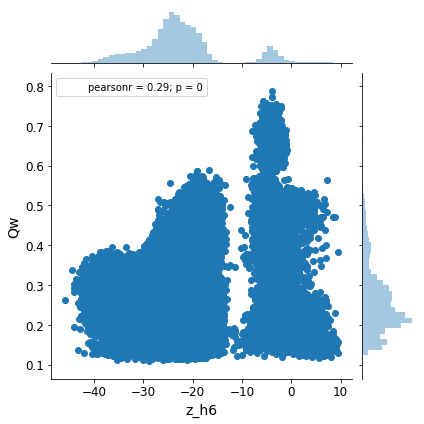

In [231]:
sns.jointplot(x="z_h6", y="Qw", data=a.query("Temp < 350"));

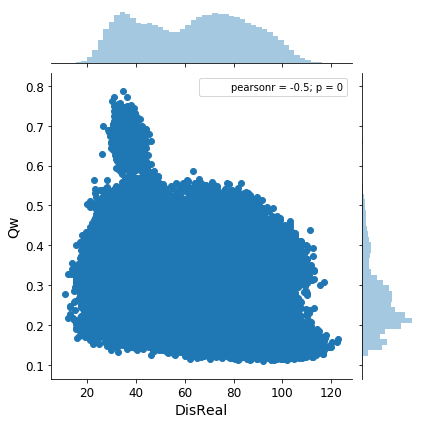

In [233]:
sns.jointplot(x="DisReal", y="Qw", data=a.query("Temp < 350"));

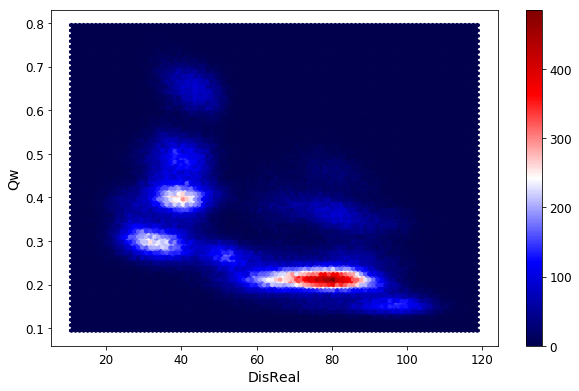

In [243]:
a.query("Temp < 350").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

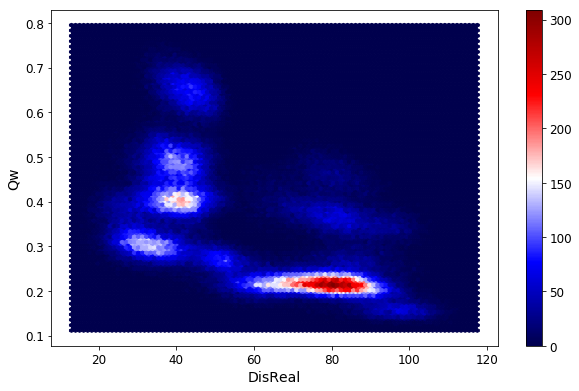

In [251]:
a.query("Temp <= 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

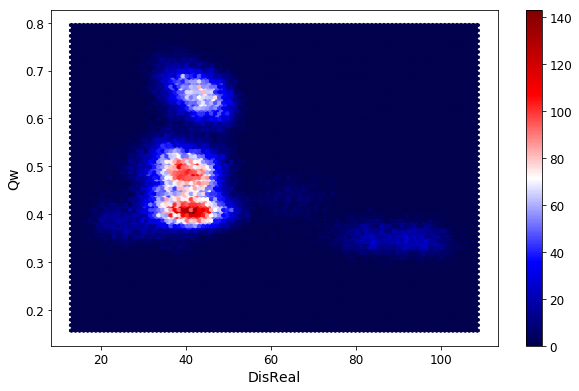

In [252]:
a.query("Temp <= 300").query("z_h6 > -10").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [258]:
a.query("Temp <= 300").query("z_h6 > -10").query("DisReal > 60").groupby(["BiasTo", "Run", "Temp"]).count()

Step    Qw  Energy  DisReal  z_average  abs_z_average  z_h1  \
BiasTo Run Temp                                                                
100.0  4   280   2388  2388    2388     2388       2388           2388  2388   
           300    112   112     112      112        112            112   112   
62.0   5   280    316   316     316      316        316            316   316   
           300    788   788     788      788        788            788   788   
74.0   3   280      2     2       2        2          2              2     2   
           300     26    26      26       26         26             26    26   
84.0   2   280   2058  2058    2058     2058       2058           2058  2058   
           300    382   382     382      382        382            382   382   
       11  300      7     7       7        7          7              7     7   

                 z_h2  z_h3  z_h4   ...    Lipid7  Lipid8  Lipid9  Lipid10  \
BiasTo Run Temp                     ...                                      
100.0  4   280   2388  2388  2388   ...      2388    2388    2388     2388   
           300    112   112   112   ...       112     112     112      112   
62.0   5   280    316   316   316   ...       316     316     316      316   
           300    788   788   788   ...       788     788     788      788   
74.0   3   280      2     2     2   ...         2       2       2        2   
           300     26    26    26   ...        26      26      26       26   
84.0   2   280   2058  2058  2058   ...      2058    2058    2058     2058   
           300    382   382   382   ...       382     382     382      382   
       11  300      7     7     7   ...         7       7       7        7   

                 Lipid11  Lipid12  Lipid13  Lipid14  Lipid15  TotalE  
BiasTo Run Temp                                                       
100.0  4   280      2388     2388     2388     2388     2388    2388  
           300       112      112      112      112      112     112  
62.0   5   280       316      316      316      316      316     316  
           300       788      788      788      788      788     788  
74.0   3   280         2        2        2        2        2       2  
           300        26       26       26       26       26      26  
84.0   2   280      2058     2058     2058     2058     2058    2058  
           300       382      382      382      382      382     382  
       11  300         7        7        7        7        7       7  

[9 rows x 40 columns]

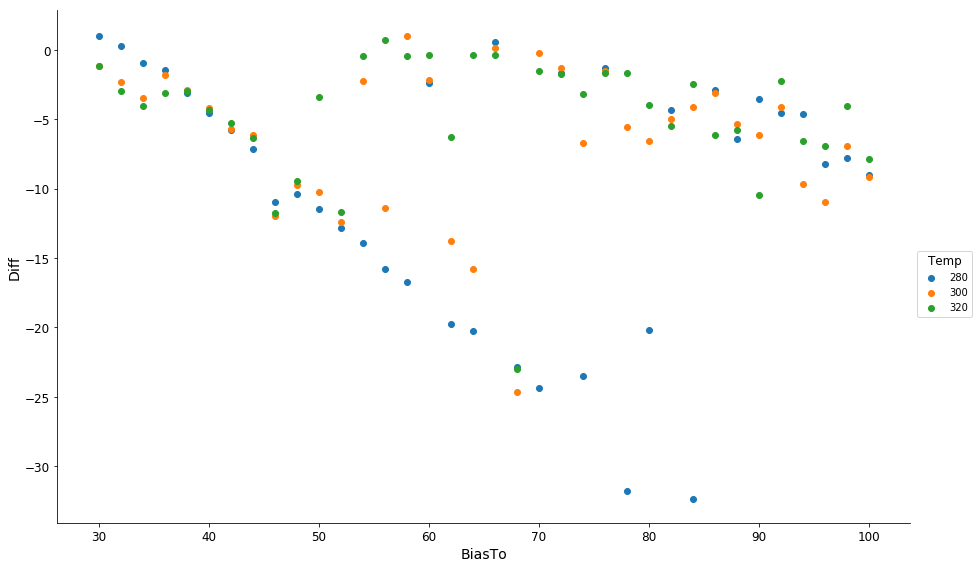

In [259]:
pre = "/Users/weilu/Research/server/mar_2018/04_week/all_data_folder/sixth_disRealrerun_5_22_Mar_011035.feather"
a = pd.read_feather(pre)
dic = {"T0":280, "T1":300, "T2":320, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
t = a.query("Temp < 350").groupby(["BiasTo","Temp"])["DisReal"].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [272]:
a.query("Temp <= 300").query("z_h6 < -25").query("Qw > 0.27").groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 100")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
30.0   3    1451.0  26.775469  4.191240  12.732367  23.868628  26.773933   
32.0   2     596.0  28.668695  4.013523  18.982929  25.752296  28.537910   
       3     201.0  27.780931  4.210377  17.607960  24.864935  27.482711   
       6     953.0  28.597959  3.813657  17.963771  25.976954  28.315004   
34.0   0     314.0  28.943226  4.177658  18.995050  26.140434  29.013464   
       6     371.0  29.629860  4.319721  15.996246  26.867136  29.783026   
       7    1194.0  30.273831  4.123479  16.961424  27.455812  30.221233   
36.0   1     429.0  30.928237  4.043800  19.577107  28.071139  30.927761   
       5     146.0  31.011621  4.149298  21.096113  28.366659  31.247808   
38.0   3     208.0  33.706181  4.292424  23.513956  30.391557  33.963498   
40.0   0     191.0  33.934856  4.236010  24.504176  31.055226  34.253782   
       2     333.0  33.331415  3.886726  22.172080  30.588776  33.508581   
44.0   4     229.0  35.402512  4.622091  22.965485  32.300523  35.621254   
       10    347.0  35.871226  3.821441  25.333871  33.583921  36.104533   
46.0   3    1242.0  36.630739  4.404028  23.350190  33.648775  36.576398   
       4    1412.0  36.972354  4.385575  21.685060  33.913417  37.056968   
64.0   0     155.0  48.277063  4.016293  35.506301  45.346265  48.048530   

                  75%        max  
BiasTo Run                        
30.0   3    29.508713  40.218079  
32.0   2    31.502815  42.007015  
       3    30.798262  40.558366  
       6    31.205409  40.644347  
34.0   0    31.848072  40.069250  
       6    32.226166  43.821289  
       7    32.990687  45.241523  
36.0   1    33.764570  42.684972  
       5    33.792296  42.795968  
38.0   3    37.240715  43.976531  
40.0   0    36.601507  44.755169  
       2    36.022570  42.548485  
44.0   4    38.344479  51.737619  
       10   38.203994  47.610793  
46.0   3    39.468108  51.759846  
       4    40.013140  54.228223  
64.0   0    51.350722  58.639815

In [280]:
a["z_squre_sum"] = a["z_h1"]**2 + a["z_h2"]**2 + a["z_h3"]**2 + a["z_h4"]**2 + a["z_h5"]**2 + a["z_h6"]**2

In [281]:
a.query("Temp <= 300").query("z_h6 < -10").query("z_h6 > -25").query("Qw > 0.27").groupby(["BiasTo", "Run"])["z_squre_sum"].describe().query("count > 100")

count         mean         std          min          25%  \
BiasTo Run                                                              
100.0  3    1520.0   778.490540  158.375135   397.848595   651.475178   
       5    1573.0   742.658218  176.407689   399.534102   602.422118   
       8    1792.0   751.278976  166.070117   379.738140   619.098120   
30.0   3     281.0  3700.310267  327.390957  2654.021727  3490.596857   
32.0   2     298.0  1689.146426  235.015768  1142.850034  1524.100229   
       6     459.0  1752.200002  249.526536  1136.240646  1577.674851   
34.0   7     487.0  1785.557295  228.610828  1201.341479  1621.470126   
36.0   1     368.0  1780.197383  253.725141  1076.480573  1579.848394   
38.0   3     153.0  1801.402698  211.043057  1186.627219  1668.070757   
       7     222.0  1709.541424  289.547371  1160.079561  1484.406879   
40.0   0     441.0  1783.120890  325.271835   692.293025  1599.573019   
       2     266.0  1857.404800  216.922794  1262.662696  1712.910430   
44.0   10   1034.0  1853.810115  252.496721  1053.597138  1706.528537   
46.0   3     255.0  3652.339980  399.917248  2647.972303  3389.677298   
       4     190.0  3766.899619  344.091885  2748.206501  3549.919397   
50.0   9     203.0  1771.114727  223.344116  1143.226166  1606.880400   
54.0   4     301.0  1735.028764  226.683940  1173.206950  1569.952009   
       6     389.0  1745.445285  218.255746  1003.813752  1607.112867   
60.0   1     398.0  1652.966380  177.639656  1188.919789  1528.017070   
       6     485.0  1740.446387  230.846015  1075.910341  1573.971161   
62.0   4     558.0   630.666850  114.036070   349.375965   548.325024   
       9     337.0   618.149763   82.002362   397.177890   565.384917   
64.0   0    2304.0  1876.079326  263.667380   833.454306  1720.016685   
66.0   11   1027.0   633.002873  100.985749   388.386183   561.633807   
70.0   1     198.0   622.690121   86.372901   399.992982   568.471029   
       6     370.0   608.625701   80.750942   397.786371   551.808310   
       8     184.0   610.066979   89.832982   415.239563   549.235078   
72.0   3    1921.0   618.784469   89.751087   368.500774   557.100812   
74.0   5     322.0  1833.189546  228.284756  1124.133145  1686.522057   
78.0   6    2438.0   603.809177   84.289213   346.638521   546.447855   
80.0   0    1223.0   625.818319  113.795940   367.248835   553.660084   
82.0   7    1966.0   601.366852   83.634738   348.051892   541.434173   
       11    338.0   989.100185  162.587266   415.904626   890.915334   
86.0   4     178.0   633.424363  107.418281   405.208254   574.366116   
       7     382.0   599.551865   87.301574   376.960276   542.657267   
88.0   0    2353.0   621.503950  109.325841   321.376056   547.414129   
94.0   8     656.0   664.229766  124.924476   395.219968   576.836485   
96.0   0     681.0   840.943882  212.095329   319.035116   693.169349   
       7    2431.0   749.657798  157.039842   394.559946   625.659459   

                    50%          75%          max  
BiasTo Run                                         
100.0  3     785.262815   892.528452  1332.810428  
       5     710.844132   867.922889  1838.930674  
       8     738.488431   870.189087  1489.920791  
30.0   3    3728.984102  3909.781025  4535.069393  
32.0   2    1685.578149  1865.267867  2401.123627  
       6    1781.451776  1935.003767  2436.903140  
34.0   7    1797.320964  1940.790361  2554.760559  
36.0   1    1795.389255  1973.926317  2570.529716  
38.0   3    1830.633874  1954.642447  2391.272229  
       7    1678.865077  1952.243757  2401.788170  
40.0   0    1789.917702  2008.425651  2596.722282  
       2    1871.324675  1996.148851  2417.946201  
44.0   10   1881.498855  2024.670146  2541.453834  
46.0   3    3672.489013  3908.395970  4620.100326  
       4    3794.029154  3994.195028  4533.570315  
50.0   9    1768.990121  1905.228854  2320.784832  
54.0   4    1723.689463  1888.500388  2471.000622  
       6    1750.737119  1893.1

In [274]:
a.query("Temp <= 300").query("z_h6 < -10").query("z_h6 > -25").query("Qw > 0.27").groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 100")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
100.0  3    1520.0  92.201118  5.713081  75.181774  88.383196  92.577106   
       5    1573.0  90.253158  5.883685  74.617872  85.936747  90.124211   
       8    1792.0  90.341411  5.400768  73.923741  86.654609  90.533414   
30.0   3     281.0  27.411933  4.302354  12.918303  24.318498  27.296747   
32.0   2     298.0  30.082505  4.486101  20.450586  26.457748  29.886926   
       6     459.0  30.920248  5.162535  16.025744  27.205903  30.484350   
34.0   7     487.0  31.105063  4.929154  17.022029  27.540909  30.924676   
36.0   1     368.0  33.951848  5.008803  19.154484  30.840253  34.332293   
38.0   3     153.0  35.466917  4.658558  25.367202  32.234625  35.347992   
       7     222.0  35.429716  4.157414  25.081224  32.530839  35.508764   
40.0   0     441.0  36.792090  4.459677  22.868361  34.093138  37.216976   
       2     266.0  36.146338  4.394808  22.902579  33.172079  36.821576   
44.0   10   1034.0  39.424330  3.577459  25.686443  37.043989  39.486703   
46.0   3     255.0  37.159856  4.163967  26.929697  34.060744  37.298784   
       4     190.0  36.650374  4.407169  23.727715  33.549696  36.451787   
50.0   9     203.0  46.016264  4.285140  32.201934  43.514000  46.617877   
54.0   4     301.0  49.157675  4.100622  32.218982  47.056338  49.552237   
       6     389.0  48.703811  3.947641  35.106307  46.025866  48.866388   
60.0   1     398.0  51.530083  3.122063  41.281450  49.261176  51.501325   
       6     485.0  51.281809  3.714681  40.213321  48.769104  51.392751   
62.0   4     558.0  60.869154  5.465468  43.773108  57.320460  60.879846   
       9     337.0  61.752131  5.315679  46.846076  58.190406  61.477268   
64.0   0    2304.0  48.100104  3.577071  36.948692  45.766104  48.073650   
66.0   11   1027.0  64.877927  4.983393  48.670544  61.684164  64.929177   
70.0   1     198.0  67.990663  4.581833  56.943344  64.559954  68.013854   
       6     370.0  68.623557  4.676763  48.196524  65.960441  68.792660   
       8     184.0  67.821757  4.678807  53.714563  65.478680  67.971502   
72.0   3    1921.0  68.834661  4.777808  52.852339  65.522477  68.845290   
74.0   5     322.0  53.593326  5.070333  43.632018  50.696082  52.665441   
78.0   6    2438.0  73.659372  4.415032  57.162077  70.686555  73.686130   
80.0   0    1223.0  75.349515  4.664575  59.837121  72.267063  75.355269   
82.0   7    1966.0  76.095081  4.256591  63.210357  73.273469  76.133612   
       11    338.0  73.005014  4.305351  61.813887  70.182330  73.162064   
86.0   4     178.0  77.877530  4.199605  69.398689  74.933409  77.816365   
       7     382.0  78.073266  4.348298  65.496214  75.050498  78.005490   
88.0   0    2353.0  80.605420  4.613849  65.785005  77.527516  80.414046   
94.0   8     656.0  81.939306  5.670157  67.013629  77.701203  81.970402   
96.0   0     681.0  81.080491  4.100259  66.257348  78.152054  81.097645   
       7    2431.0  88.632441  5.447574  73.219620  84.722084  88.847560   

                  75%         max  
BiasTo Run                         
100.0  3    96.550518  108.401840  
       5    94.554586  107.027723  
       8    94.170858  108.545019  
30.0   3    30.146762   40.852790  
32.0   2    33.384279   44.349988  
       6    34.828637   43.823348  
34.0   7    34.692143   44.190058  
36.0   1    37.469057   49.432876  
38.0   3    38.639242   45.906415  
       7    38.406332   46.919270  
40.0   0    40.006425   49.622638  
       2    39.440945   47.944311  
44.0   10   41.661505   50.974888  
46.0   3    39.994270   48.014495  
       4    39.727371   46.976181  
50.0   9    49.001428   57.055684  
54.0   4    51.780622   58.224935  
       6    51.603476   60.046556  
60.0   1    53.497865   59.891568  
       6    53.578429   64.478550  
62.0   4    64.650773   80.880857  
       9    65.401635   76.504830  
64.0   0    50.569584   60.32463

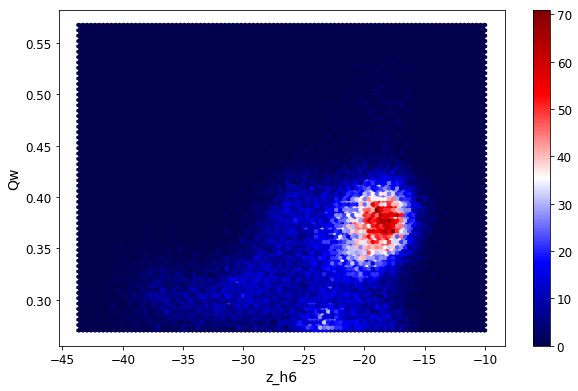

In [266]:
a.query("Temp <= 300").query("z_h6 < -10").query("Qw > 0.27").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

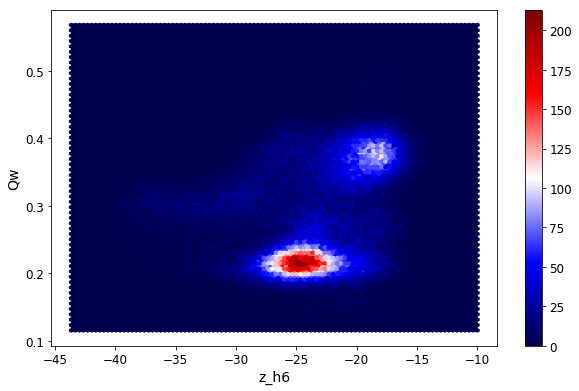

In [262]:
a.query("Temp <= 300").query("z_h6 < -10").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

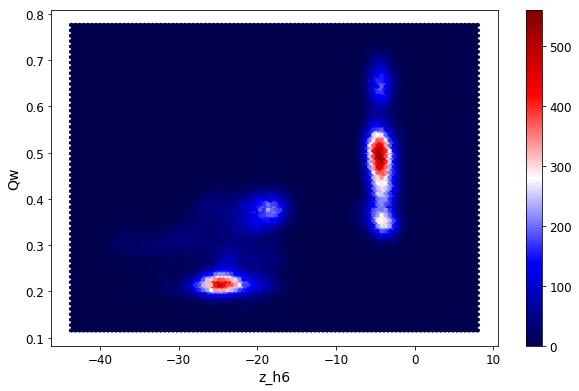

In [261]:
a.query("Temp <= 300").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

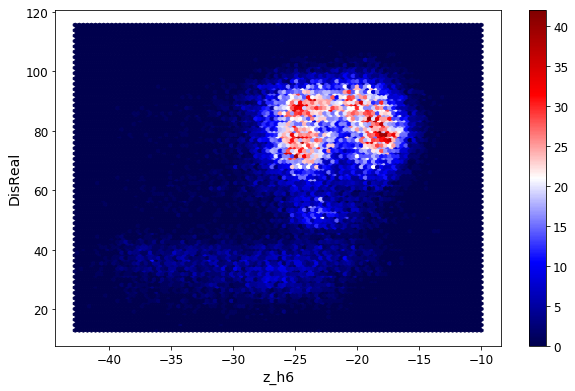

In [189]:
a.query("Temp == 280").query("z_h6 < -10").plot.hexbin("z_h6", "DisReal", cmap="seismic", sharex=False)

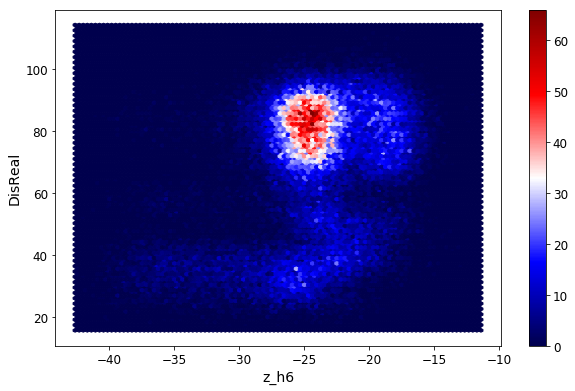

In [172]:
a.query("Temp == 280").query("z_h6 < -10").plot.hexbin("z_h6", "DisReal", cmap="seismic", sharex=False)

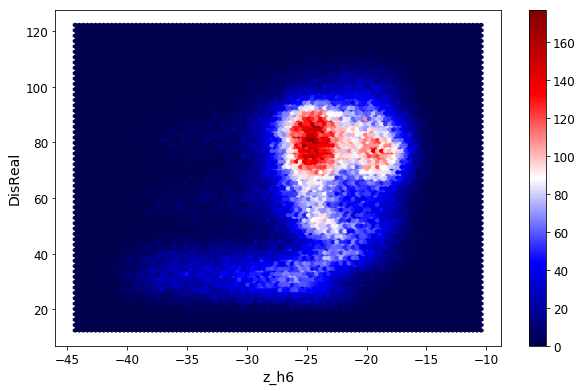

In [146]:
a.query("Temp < 350").query("z_h6 < -10").plot.hexbin("z_h6", "DisReal", cmap="seismic", sharex=False)

In [ ]:
a.query("Temp == 280").query("z_h6 < -10").query("z_h6> -30 and z_h6 < -20 and DisReal < 100 and DisReal > 70").groupby("")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a833e3a20>]], dtype=object)

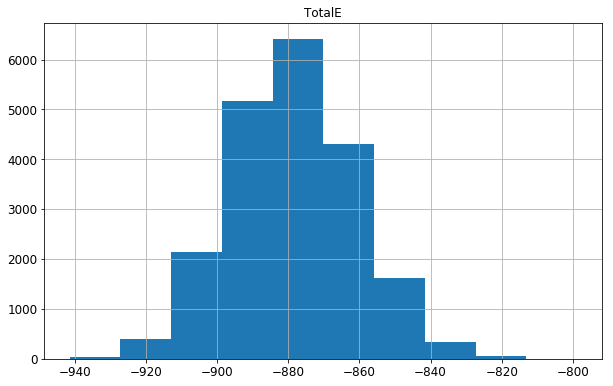

In [170]:
a.query("Temp == 280").query("z_h6 < -10").query("z_h6> -30 and z_h6 < -20 and DisReal < 100 and DisReal > 70").hist("TotalE")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a8375e898>]], dtype=object)

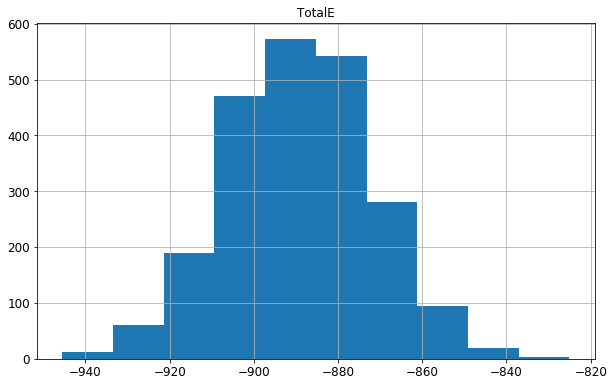

In [171]:
a.query("Temp == 280").query("z_h6 < -10").query("z_h6> -40 and z_h6 < -30 and DisReal < 45").hist("TotalE")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a83743fd0>]], dtype=object)

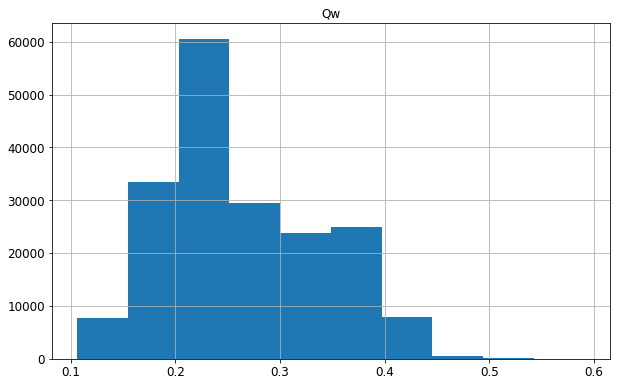

In [167]:
a.query("Temp < 350").query("z_h6 < -10").hist("Qw")

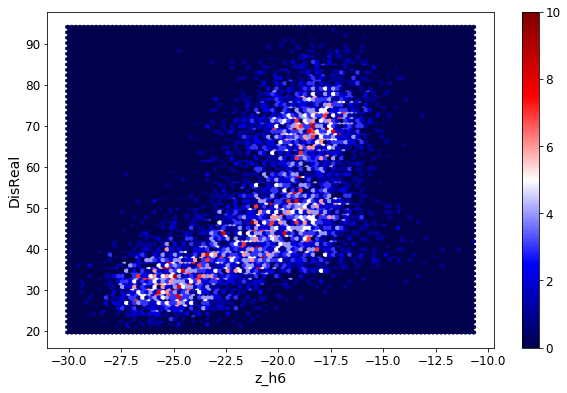

In [166]:
a.query("Temp < 350").query("z_h6 < -10").query("Qw > 0.4").plot.hexbin("z_h6", "DisReal", cmap="seismic", sharex=False)

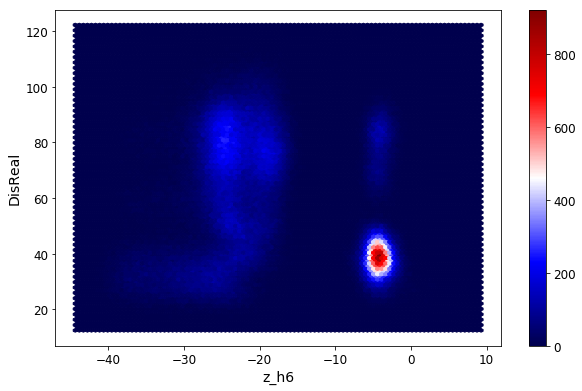

In [144]:
a.query("Temp < 350").plot.hexbin("z_h6", "DisReal", cmap="seismic", sharex=False)

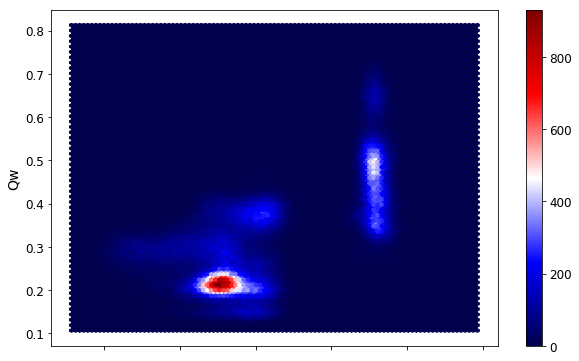

In [134]:
a.query("Temp < 350").plot.hexbin("z_h6", "Qw", cmap="seismic")

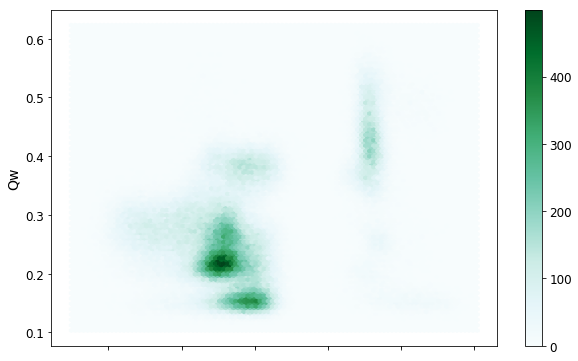

In [104]:
a.query("Temp < 350").plot.hexbin("z_h6", "Qw")

In [112]:
a.query("Temp < 350").query("z_h6 < -10").query("DisReal < 60").groupby(["BiasTo", "Run"]).count().reset_index().query("Step > 2000")

BiasTo  Run  Step  Temp    Qw  Energy  DisReal  z_average  abs_z_average  \
1     30.0    3  2488  2488  2488    2488     2488       2488           2488   
7     32.0    2  2462  2462  2462    2462     2462       2462           2462   
8     32.0    3  2038  2038  2038    2038     2038       2038           2038   
10    32.0    5  2040  2040  2040    2040     2040       2040           2040   
11    34.0    0  2444  2444  2444    2444     2444       2444           2444   
12    34.0    5  2128  2128  2128    2128     2128       2128           2128   
14    34.0    9  2500  2500  2500    2500     2500       2500           2500   
15    36.0    1  2218  2218  2218    2218     2218       2218           2218   
19    38.0    1  2260  2260  2260    2260     2260       2260           2260   
33    44.0    4  2375  2375  2375    2375     2375       2375           2375   
37    44.0   10  2500  2500  2500    2500     2500       2500           2500   
39    46.0    3  2356  2356  2356    2356     2356       2356           2356   
48    48.0    7  2408  2408  2408    2408     2408       2408           2408   
50    48.0    9  2152  2152  2152    2152     2152       2152           2152   
52    50.0    2  2380  2380  2380    2380     2380       2380           2380   
58    52.0    1  2010  2010  2010    2010     2010       2010           2010   
60    52.0    3  2225  2225  2225    2225     2225       2225           2225   
68    54.0    5  2338  2338  2338    2338     2338       2338           2338   
71    56.0    0  2130  2130  2130    2130     2130       2130           2130   
72    56.0    1  2500  2500  2500    2500     2500       2500           2500   
77    56.0   11  2194  2194  2194    2194     2194       2194           2194   
78    58.0    1  2500  2500  2500    2500     2500       2500           2500   
99    64.0    0  2497  2497  2497    2497     2497       2497           2497   
100   64.0    1  2498  2498  2498    2498     2498       2498           2498   

     z_h1   ...    Lipid7  Lipid8  Lipid9  Lipid10  Lipid11  Lipid12  Lipid13  \
1    2488   ...      2488    2488    2488     2488     2488     2488     2488   
7    2462   ...      2462    2462    2462     2462     2462     2462     2462   
8    2038   ...      2038    2038    2038     2038     2038     2038     2038   
10   2040   ...      2040    2040    2040     2040     2040     2040     2040   
11   2444   ...      2444    2444    2444     2444     2444     2444     2444   
12   2128   ...      2128    2128    2128     2128     2128     2128     2128   
14   2500   ...      2500    2500    2500     2500     2500     2500     2500   
15   2218   ...      2218    2218    2218     2218     2218     2218     2218   
19   2260   ...      2260    2260    2260     2260     2260     2260     2260   
33   2375   ...      2375    2375    2375     2375     2375     2375     2375   
37   2500   ...      2500    2500    2500     2500     2500     2500     2500   
39   2356   ...      2356    2356    2356     2356     2356     2356     2356   
48   2408   ...      2408    2408    2408     2408     2408     2408     2408   
50   2152   ...      2152    2152    2152     2152     2152     2152     2152   
52   2380   ...      2380    2380    2380     2380     2380     2380     2380   
58   2010   ...      2010    2010    2010     2010     2010     2010     2010   
60   2225   ...      2225    2225    2225     2225     2225     2225     2225   
68   2338   ...      2338    2338    2338     2338     2338     2338     2338   
71   2130   ...      2130    2130    2130     2130     2130     2130     2130   
72   2500   ...      2500    2500    2500     2500     2500     2500     2500   
77   2194   ...      2194    2194    2194     2194     2194     2194     2194   
78   2500   ...      2500    2500    2500     2500     2500     2500     2500   
99   2497   ...      2497    2497    2497     2497     2497     2497     2497   
100  2498   ...      2498    2498    2498     2498     2498

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4a4cebe0>]], dtype=object)

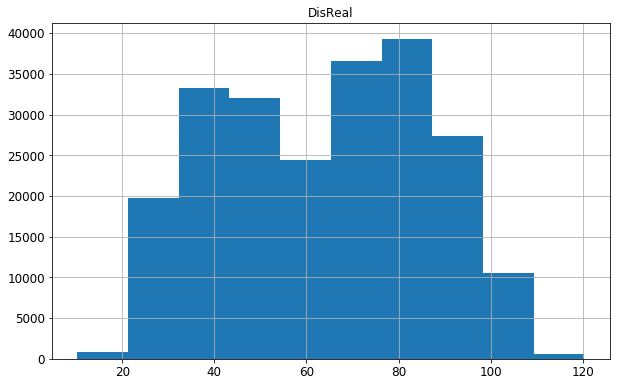

In [106]:
a.query("Temp < 350").query("z_h6 < -10").hist("DisReal")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19cca940>]], dtype=object)

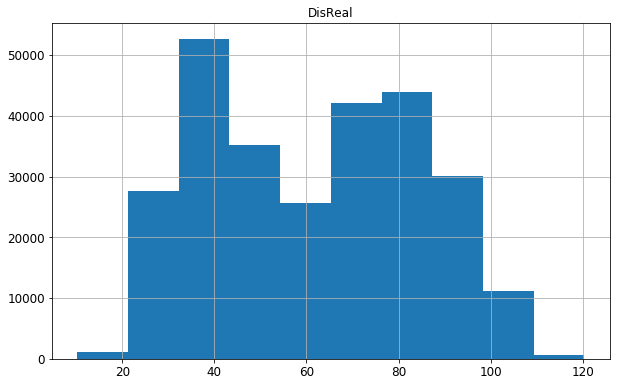

In [107]:
a.query("Temp < 350").hist("DisReal")

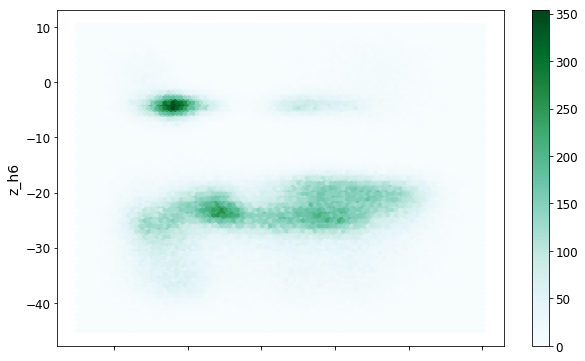

In [101]:
a.query("Temp < 350").plot.hexbin("DisReal", "z_h6")

In [99]:
a.query("Temp < 350").groupby("BiasTo").mean()

Step       Run   Temp        Qw      Energy    DisReal  \
BiasTo                                                                 
100.0   15002000.0  5.863467  300.0  0.165718 -813.066553  99.916848   
30.0    15002000.0  4.726667  300.0  0.307683 -838.083820  27.924465   
32.0    15002000.0  2.910667  300.0  0.339652 -848.551723  29.322055   
34.0    15002000.0  4.797067  300.0  0.314676 -842.083452  31.382056   
36.0    15002000.0  3.888000  300.0  0.399403 -847.145686  32.129053   
38.0    15002000.0  1.613067  300.0  0.400826 -851.758103  33.817885   
40.0    15002000.0  4.093600  300.0  0.443200 -850.902131  36.229693   
42.0    15002000.0  3.768267  300.0  0.363240 -847.965904  36.159777   
44.0    15002000.0  5.902667  300.0  0.304633 -840.220269  39.484148   
46.0    15002000.0  3.184800  300.0  0.298501 -837.660842  36.399708   
48.0    15002000.0  6.564267  300.0  0.272994 -839.335252  42.000946   
50.0    15002000.0  6.844000  300.0  0.299288 -838.263334  41.393224   
52.0    15002000.0  2.542133  300.0  0.240881 -831.390078  51.577107   
54.0    15002000.0  4.225600  300.0  0.320162 -840.038355  47.219807   
56.0    15002000.0  4.009333  300.0  0.297948 -837.432056  49.010922   
58.0    15002000.0  3.265600  300.0  0.275555 -836.445934  52.881451   
60.0    15002000.0  5.587733  300.0  0.228853 -832.413738  58.548552   
62.0    15002000.0  5.459733  300.0  0.322065 -834.400598  53.447739   
64.0    15002000.0  1.789600  300.0  0.311012 -839.241018  53.293821   
66.0    15002000.0  3.933333  300.0  0.285854 -835.820417  66.995291   
68.0    15002000.0  2.651733  300.0  0.288647 -832.534324  60.104193   
70.0    15002000.0  4.924267  300.0  0.325176 -831.448651  69.594870   
72.0    15002000.0  4.312000  300.0  0.232538 -821.510807  69.981278   
74.0    15002000.0  3.835733  300.0  0.234994 -827.320362  73.032168   
76.0    15002000.0  4.816000  300.0  0.208568 -825.010125  74.921031   
78.0    15002000.0  5.174933  300.0  0.266099 -828.769283  75.132320   
80.0    15002000.0  4.003200  300.0  0.216048 -833.207744  77.918095   
82.0    15002000.0  4.613867  300.0  0.252086 -819.351352  79.615888   
84.0    15002000.0  2.383733  300.0  0.313936 -833.479928  82.839617   
86.0    15002000.0  5.811200  300.0  0.201351 -819.382473  85.009644   
88.0    15002000.0  2.810400  300.0  0.220797 -822.103808  84.632942   
90.0    15002000.0  4.566133  300.0  0.198020 -817.777249  88.681399   
92.0    15002000.0  5.842933  300.0  0.176849 -819.274584  90.225536   
94.0    15002000.0  5.394667  300.0  0.185791 -817.855857  92.360703   
96.0    15002000.0  6.147467  300.0  0.244250 -818.855961  90.850801   
98.0    15002000.0  5.827200  300.0  0.162972 -814.782138  96.920021   

        z_average  abs_z_average      z_h1      z_h2     ...        Lipid7  \
BiasTo                                                   ...                 
100.0  -14.141250      19.683660 -2.667983 -7.884711     ...      0.000367   
30.0   -11.140360      18.225993 -0.924792 -7.406355     ...     -0.656743   
32.0   -14.360967      20.743251 -0.779509 -7.264907     ...     -0.408159   
34.0   -12.746752      18.743569 -1.062823 -7.573799     ...     -0.023617   
36.0    -6.579244      14.658933 -0.715680 -6.781221     ...     -2.015286   
38.0    -6.763856      15.016692 -0.674885 -7.410527     ...     -1.725277   
40.0    -5.803935      13.694402 -0.929134 -7.153972     ...     -2.352872   
42.0    -9.663111      17.442734 -0.819950 -7.101598     ...     -1.564446   
44.0   -13.693647      19.610696 -1.196683 -7.780199     ...     -0.013071   
46.0   -12.584760      19.523479 -0.875939 -7.929579     ...     -0.995623   
48.0   -16.806519      22.644353 -0.940065 -7.681413     ...      0.013326   
50.0   -12.685664      19.552174 -0.735873 -7.852276     ...     -0.533966   
52.0   -11.532982      17.487977 -1.035298 -7.967745     ...      0.095431   
54.0   -11.696478      18.703713 -1.113807 -7.487484     ...     -1.097118   
56.0   -11.055559      16.786

In [70]:
from glob import glob

In [87]:
for a in glob(pre+"*.out"):
    if pd.read_table(a).iloc[-1].values[0].split(" ")[0] == '20000000':
        print(a)
        os.system(f"tail -n 5004 {a} > log0/log.lammps")

/Users/weilu/Research/server/mar_2018/sixth/rg_0.15_lipid_1.0_mem_1_go_0.8/simulation/dis_46.0/slurm-5438776.out


In [72]:
a = glob(pre+"*.out")[0]

In [85]:
pd.read_table(a).iloc[-1].values[0].split(" ")[0] == '20000000'

True

In [69]:
listdir(pre + "*.out")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/weilu/Research/server/mar_2018/sixth/rg_0.15_lipid_1.0_mem_1_go_0.8/simulation/dis_46.0/*.out'

In [5]:
dic = {"T0":280, "T1":300, "T2":325, "T3":350, "T4":375, "T5":400, "T6":450, "T7":500, "T8":550, "T9":600, "T10":650, "T11":700}

In [4]:
a = pd.read_feather("/Users/weilu/Research/server/mar_2018/fifth/rg_0.2_lipid_1.0_mem_1_go_0.7/rerun_1_19_Mar_142706.feather")
# a = a.dropna()
a["Temp"] = a["Temp"].apply(lambda x: dic[x])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dff7e10>]], dtype=object)

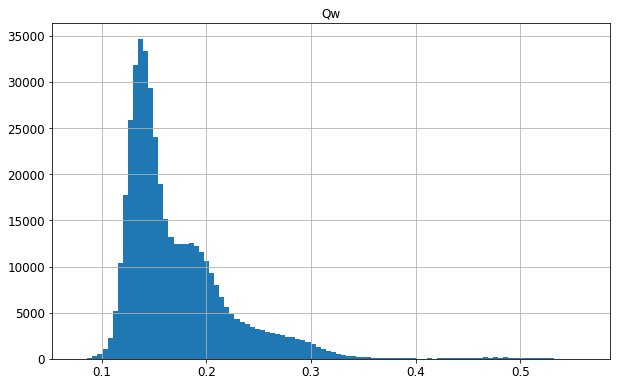

In [17]:
a.query("Temp < 400").hist("Qw", bins=100, sharex=True)

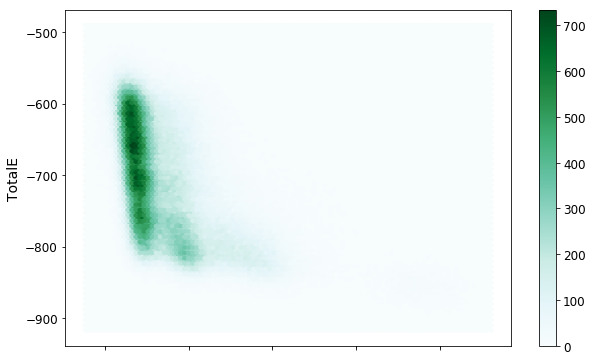

In [25]:
a.query("Temp < 400").plot.hexbin("Qw", "TotalE")

In [20]:
a.query("Temp < 400").query("Qw > 0.5").groupby(["BiasTo", "Run"]).count()

Step  Temp   Qw  Energy  DisReal  z_average  abs_z_average  z_h1  \
BiasTo Run                                                                     
50.0   4     450   450  450     450      450        450            450   450   

            z_h2  z_h3   ...    Lipid7  Lipid8  Lipid9  Lipid10  Lipid11  \
BiasTo Run               ...                                               
50.0   4     450   450   ...       450     450     450      450      450   

            Lipid12  Lipid13  Lipid14  Lipid15  TotalE  
BiasTo Run                                              
50.0   4        450      450      450      450     450  

[1 rows x 41 columns]

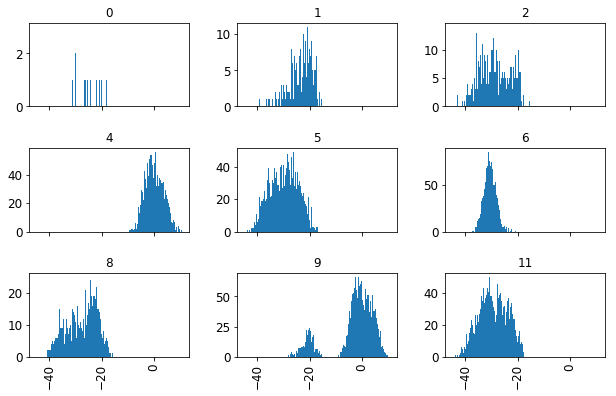

In [16]:
_ = a.query("BiasTo == '30.0'").query("Temp < 400").hist("z_h6", by="Run", bins=100, sharex=True)

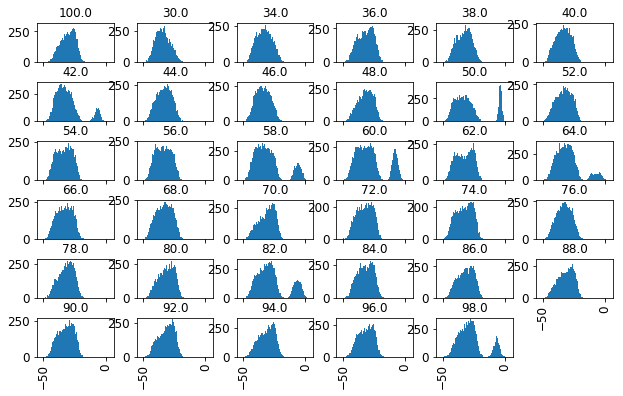

In [26]:
_ = a.query("Temp < 400").hist("z_h3", by="BiasTo", bins=100, sharex=True)

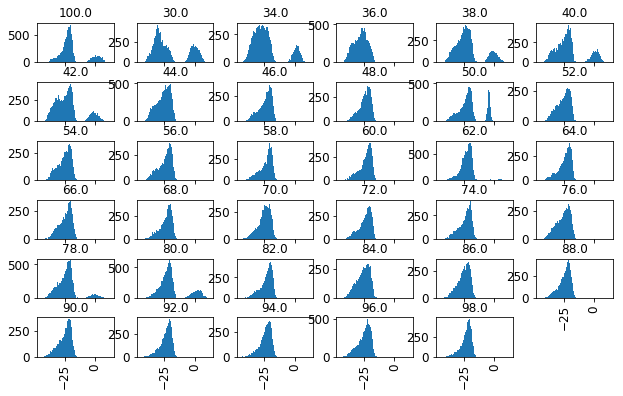

In [9]:
_ = a.query("Temp < 400").hist("z_h6", by="BiasTo", bins=100, sharex=True)

In [29]:
a.query("Temp < 400").groupby("BiasTo")["DisReal"].mean()

BiasTo
100.0    99.488703
30.0     27.586522
34.0     31.922271
36.0     35.206968
38.0     35.696734
40.0     37.602098
42.0     38.938335
44.0     43.811859
46.0     46.356958
48.0     48.958792
50.0     48.403342
52.0     52.649195
54.0     54.458398
56.0     56.294881
58.0     57.874692
60.0     59.131223
62.0     61.442663
64.0     63.366777
66.0     65.600632
68.0     67.799998
70.0     69.678454
72.0     71.279685
74.0     73.407220
76.0     75.165531
78.0     77.421104
80.0     78.806358
82.0     80.550162
84.0     83.622545
86.0     85.748922
88.0     87.702830
90.0     89.858022
92.0     92.050258
94.0     93.333538
96.0     95.819005
98.0     97.196136
Name: DisReal, dtype: float64

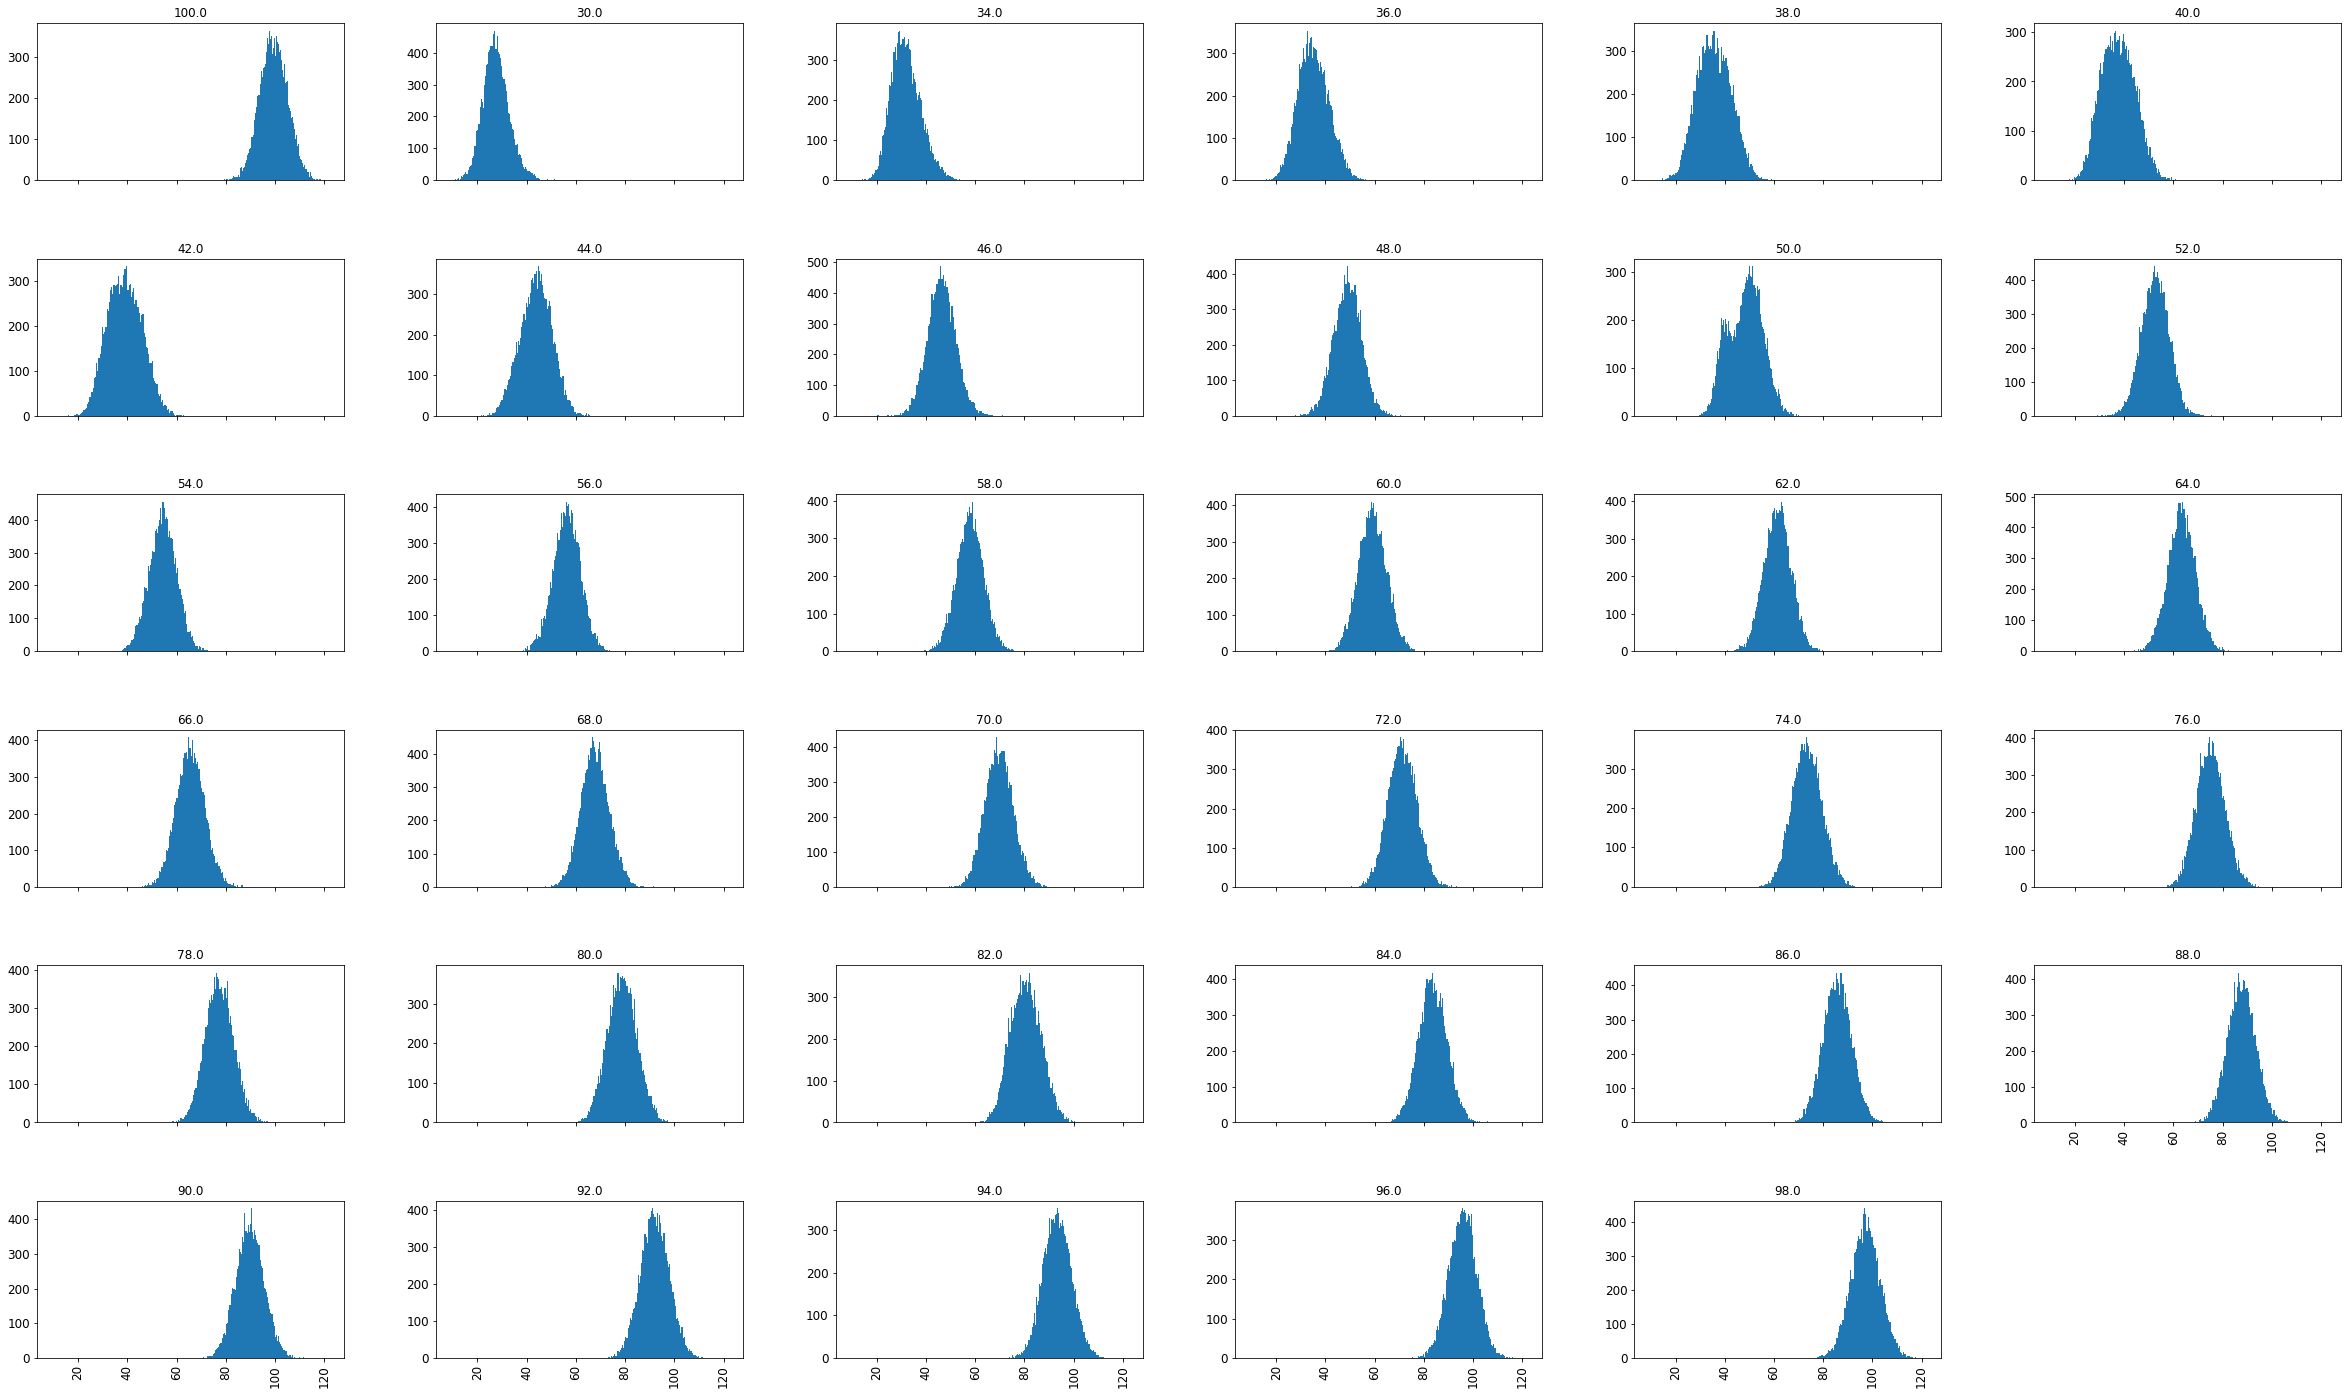

In [28]:
_ = a.query("Temp < 400").hist("DisReal", by="BiasTo", bins=100, sharex=True, figsize=(4*10,4*6.180))

In [ ]:
a = pd.read_feather("/Users/weilu/Research/server/mar_2018/extra_03_week/change_rg_why_not_80/18_Mar_222159.feather")
a = a.dropna()

In [ ]:
_ = a.query("Folder == 'rg_0.2_force_0.01_mem_0.6_'").hist("DisReal", by="Run", bins=100)

In [ ]:
_ = a.query("Folder == 'rg_0.2_force_0.01_mem_0.6_'").query("Steps > 1e7").hist("DisReal", by="Run", bins=100)

In [ ]:
c = a[["Folder", "Run", "DisReal"]].reset_index()
# c["change"] = c["Folder"].apply(lambda x: x.split("_")[1])
# c["Folder"] = c["Folder"].apply(lambda x: "_".join(x.split("_")[2:]))
ax = c.hist("DisReal", by="Folder", bins=100, layout=(4, 3), figsize=(4*10,4*6.180))
# ax = c.query("change == '12'").hist("DisReal", by="Folder", bins=50, ax=ax, alpha=0.5)

In [ ]:
a = pd.read_feather("/Users/weilu/Research/server/mar_2018/extra_03_week/second_q_bias/test.feather")

In [ ]:
a["Temp"] = "T_defined"

In [ ]:
a["BiasTo"] = a["Run"].apply(lambda x: float(x.split("_")[1])*0.02)

In [ ]:
a.columns

In [ ]:
a = pd.read_feather("/Users/weilu/Research/server/mar_2018/extra_03_week/new_lmps_kbin_why_80_is_not_favored/18_Mar_153054.feather")

In [ ]:
c = a[["Folder", "Run", "DisReal"]].reset_index()
c["change"] = c["Folder"].apply(lambda x: x.split("_")[1])
c["Folder"] = c["Folder"].apply(lambda x: "_".join(x.split("_")[2:]))
ax = c.query("change == '15'").hist("DisReal", by="Folder", bins=50, layout=(4, 2), figsize=(4*10,4*6.180))
ax = c.query("change == '12'").hist("DisReal", by="Folder", bins=50, ax=ax, alpha=0.5)

In [ ]:
a = a.dropna()
c = a[["Folder", "Run", "z_h6", "z_h5", "rg5", "rg6"]].reset_index()
c["change"] = c["Folder"].apply(lambda x: x.split("_")[1])
c["Folder"] = c["Folder"].apply(lambda x: "_".join(x.split("_")[2:]))
ax = c.query("change == '15'").hist("rg5", by="Folder", bins=50, layout=(4, 2), figsize=(4*10,4*6.180))
ax = c.query("change == '12'").hist("rg5", by="Folder", bins=50, ax=ax, alpha=0.5)

In [ ]:
a = pd.read_feather("/Users/weilu/Research/server/mar_2018/extra_03_week/why_80_is_not_favored/18_Mar_135328.feather")

In [ ]:
a = a.dropna()

In [ ]:
t = ['change', '15', 'temperature', '320', 'force', '0.02', 'mem', '0.1', '']

In [ ]:
"_".join(t[2:])

In [ ]:
"change_15_temperature_320_force_0.02_mem_0.1_".split("_")

In [ ]:
c.pivot_table(index="Folder", columns="change", values="DisReal")

In [ ]:
a.columns

In [ ]:
c = a.query("Steps > 2e7")[["Folder", "Run", "z_h6", "z_h5", "rg5", "rg6"]].reset_index()
c["change"] = c["Folder"].apply(lambda x: x.split("_")[1])
c["Folder"] = c["Folder"].apply(lambda x: "_".join(x.split("_")[2:]))
ax = c.query("change == '15'").hist("rg6", by="Folder", bins=50, layout=(4, 2), figsize=(4*10,4*6.180))
ax = c.query("change == '12'").hist("rg6", by="Folder", bins=50, ax=ax, alpha=0.5)

In [ ]:
c = a.query("Steps > 2e7")[["Folder", "Run", "z_h6", "z_h5"]].reset_index()
c["change"] = c["Folder"].apply(lambda x: x.split("_")[1])
c["Folder"] = c["Folder"].apply(lambda x: "_".join(x.split("_")[2:]))
ax = c.query("change == '15'").hist("z_h5", by="Folder", bins=50, layout=(4, 2), figsize=(4*10,4*6.180))
ax = c.query("change == '12'").hist("z_h5", by="Folder", bins=50, ax=ax, alpha=0.5)

In [ ]:
c = a.query("Steps > 2e7")[["Folder", "Run", "z_h6", "z_h5"]].reset_index()
c["change"] = c["Folder"].apply(lambda x: x.split("_")[1])
c["Folder"] = c["Folder"].apply(lambda x: "_".join(x.split("_")[2:]))
ax = c.query("change == '15'").hist("z_h6", by="Folder", bins=50, layout=(4, 2), figsize=(4*10,4*6.180))
ax = c.query("change == '12'").hist("z_h6", by="Folder", bins=50, ax=ax, alpha=0.5)

In [ ]:
t = a.query("Folder == 'change_12_temperature_300_force_0.02_mem_0.1_'")

In [ ]:
t = a.query("Folder == 'change_12_temperature_300_force_0.01_mem_0.1_'").query("Run == '0'")

In [ ]:
_ = t.hist("DisReal", by="Run")

In [ ]:
c = a.query("Steps > 2e7")[["Folder", "Run", "DisReal"]].reset_index()
c["change"] = c["Folder"].apply(lambda x: x.split("_")[1])
c["Folder"] = c["Folder"].apply(lambda x: "_".join(x.split("_")[2:]))
ax = c.query("change == '15'").hist("DisReal", by="Folder", bins=50, layout=(4, 2), figsize=(4*10,4*6.180))
ax = c.query("change == '12'").hist("DisReal", by="Folder", bins=50, ax=ax, alpha=0.5)

In [ ]:
c = a.query("Steps > 2e7")[["Folder", "Run", "Qw"]].reset_index()
c["change"] = c["Folder"].apply(lambda x: x.split("_")[1])
c["Folder"] = c["Folder"].apply(lambda x: "_".join(x.split("_")[2:]))
ax = c.query("change == '15'").hist("Qw", by="Folder", bins=50, layout=(4, 2), figsize=(4*10,4*6.180))
ax = c.query("change == '12'").hist("Qw", by="Folder", bins=50, ax=ax, alpha=0.5)

In [ ]:
a.query("Steps > 2e7")[["Folder", "Run", "DisReal"]].groupby(["Folder", "Run"]).mean().groupby("Folder").describe()

In [ ]:
a[["Folder", "Run", "DisReal"]].groupby(["Folder", "Run"]).mean().groupby("Folder").describe()
a.query("Folder == 'force_0.01_mem_0.6_'")[["Folder", "Run", "DisReal"]].groupby(["Folder", "Run"]).mean()
a.query("Folder == 'force_0.01_mem_0.6_'").groupby("Run").plot("Steps", "DisReal")
def smooth(x):
    x["smooth"] = x["DisReal"].ewm(span=20).mean()
    return x
c = b.groupby(["Folder", "Run"]).apply(smooth)
a = c.hist("DisReal", by="Folder", bins=50, layout=(4, 5), figsize=(4*10,4*6.180))

In [ ]:
a = pd.read_feather(("/Users/weilu/Research/server/mar_2018/extra_03_week/refold/f2.feather"))
a["Temp"] = a["Steps"]/4e7*300 + 300
a.plot("Temp", "Qw")
# plt.xlim([300,400])

In [ ]:
a = pd.read_feather(("/Users/weilu/Research/server/mar_2018/extra_03_week/refold/test1.feather"))
a["Temp"] = a["Steps"]/4e7*200 + 300
a.plot("Temp", "Qw")
# plt.xlim([300,400])

## Rate data fit

In [30]:
a = pd.read_csv("/Users/weilu/opt/pulling/refold_rate.csv", names=["x", "y"])

In [31]:
a

x         y
0  0.942149  1.000000
1  1.462810  0.858503
2  2.157025  0.668027
3  3.140496  0.401361
4  4.818182  0.096599
5  7.276860  0.004082

In [32]:
x = a["x"].values
y = a["y"].values

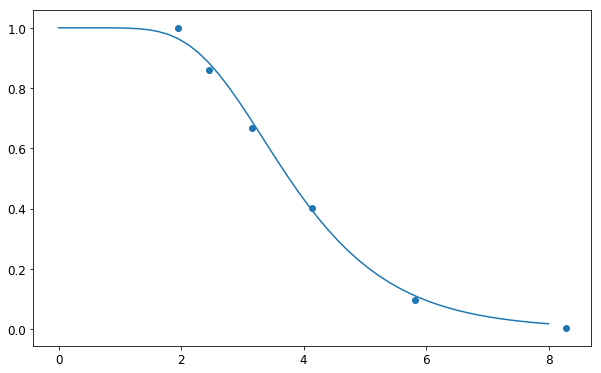

In [61]:
def refold(F, delta_u=3.56, k_f=10e-2):
    kT = 4.114 # 1kT = 4.114 pN nm
    delta_t = 3*60
    return np.exp(-delta_t*k_f*np.exp(-F*delta_u/kT))
plt.scatter(x+1,y)
f = np.linspace(0, 8)

plt.plot(f, 1-refold(f))

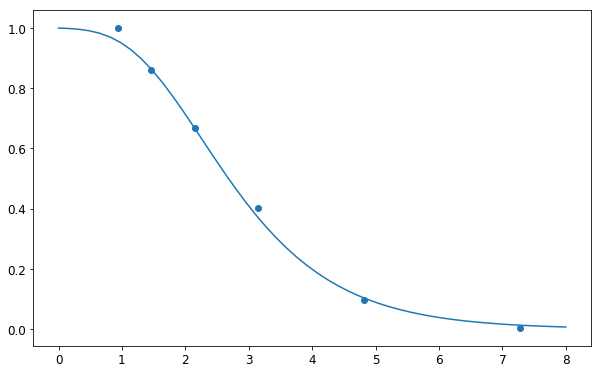

In [33]:
def refold(F, delta_u=3.56, k_f=3.91e-2):
    kT = 4.114 # 1kT = 4.114 pN nm
    delta_t = 3*60
    return np.exp(-delta_t*k_f*np.exp(-F*delta_u/kT))
plt.scatter(x,y)
f = np.linspace(0, 8)
plt.plot(f, 1-refold(f))

In [ ]:
a = pd.read_feather("/Users/weilu/Research/server/mar_2018/extra_03_week/why_80_is_not_favored/17_Mar_160642.feather")
a = a.dropna()
a[["Folder", "Run", "DisReal"]].groupby(["Folder", "Run"]).mean().groupby("Folder").describe()
a.query("Folder == 'force_0.01_mem_0.6_'")[["Folder", "Run", "DisReal"]].groupby(["Folder", "Run"]).mean()
a.query("Folder == 'force_0.01_mem_0.6_'").groupby("Run").plot("Steps", "DisReal")
def smooth(x):
    x["smooth"] = x["DisReal"].ewm(span=20).mean()
    return x
c = b.groupby(["Folder", "Run"]).apply(smooth)
a = c.hist("DisReal", by="Folder", bins=50, layout=(4, 5), figsize=(4*10,4*6.180))

In [ ]:
a.query("Folder == 'force_0.01_mem_0.6_'")[["Folder", "Run", "DisReal", "TotalE"]].groupby(["Folder", "Run"]).describe()

In [ ]:
# b = a.query('Folder.str.contains("force_0.01_")', engine='python')
b = a.query('Folder.str.contains("force_0.0001_")', engine='python')
# b = a.query('Folder.str.contains("force_0.0_")', engine='python')
# b = a.query("Folder == 'force_0.0_mem_0.0_'")

In [ ]:
test = b.query("Folder == 'force_0.0001_mem_0.0_'").query("Run == '0'")

In [ ]:
test.columns

In [ ]:
def V_membrane(z, kbin=0.4, memb=12):
    return 0.5*(np.tanh(kbin*(z+memb)) + np.tanh(kbin*(memb-z)))
# kbin = 0.2
# memb = 14.4
z = np.linspace(-30,30,100)
v = V_membrane(z)
plt.plot(z,v)

In [ ]:
def V_membrane(z, kbin=0.4, memb=15):
    return 0.5*(np.tanh(kbin*(z+memb)) + np.tanh(kbin*(memb-z)))
# kbin = 0.2
# memb = 14.4
z = np.linspace(-30,30,100)
v = V_membrane(z)
plt.plot(z,v)

In [ ]:
V_membrane(-9)

In [ ]:
np.mean(test["z_h5"])

In [ ]:
test["z_h5"].hist(bins=50)

In [ ]:
b = a.query('Folder.str.contains("mem_0.0_")', engine='python')
b = a
def smooth(x):
    x["smooth"] = x["DisReal"].ewm(span=20).mean()
    return x
c = b.groupby(["Folder", "Run"]).apply(smooth)

In [ ]:
c.hist()

In [ ]:
g = sns.FacetGrid(c, col="Folder", hue="Run", col_wrap=2, size=8)
g = g.map(plt.plot, "Steps", "smooth")

In [ ]:
g = sns.FacetGrid(c, col="Folder", hue="Run", col_wrap=2, size=8)
g = g.map(plt.plot, "Steps", "smooth")

In [ ]:
b.plot('Steps','smooth')

In [ ]:
b["DisReal"].ewm(span=20).mean().plot(style='k')

In [ ]:
b.plot('Steps','Distance')

In [ ]:
a = pd.read_feather(("/Users/weilu/Research/server/mar_2018/extra_03_week/refold/force_0.0_/test.feather"))

In [ ]:
a2 = pd.read_feather(("/Users/weilu/Research/server/mar_2018/extra_03_week/refold/force_0.01_/test.feather"))

In [ ]:
tmp = pd.read_feather(("/Users/weilu/Research/server/mar_2018/03_week/refold_different_force/force_0.03_/test.feather"))
b2 = pd.melt(tmp, id_vars=['Steps', 'Run'], value_vars=[f"z_h{i}" for i in range(1,7)])

In [ ]:
g = sns.FacetGrid(b2, col="Run", hue="variable", col_wrap=4)
g = g.map(plt.scatter, "Steps", "value").add_legend()

In [ ]:
b2 = pd.melt(a2, id_vars=['Steps', 'Run'], value_vars=[f"z_h{i}" for i in range(1,7)])

In [ ]:
b = pd.melt(a, id_vars=['Steps', 'Run'], value_vars=[f"z_h{i}" for i in range(1,7)])

In [ ]:
g = sns.FacetGrid(b2, col="Run", hue="variable", col_wrap=4)
g = g.map(plt.scatter, "Steps", "value").add_legend()

In [ ]:
g = sns.FacetGrid(b, col="Run", hue="variable", col_wrap=4)
g = g.map(plt.scatter, "Steps", "value").add_legend()

In [ ]:
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}

In [ ]:
location = "/Users/weilu/Research/server/mar_2018/03_week/all_data_folder/"
data = pd.read_feather(os.path.join(location, "rerun_2_11_Mar_160738.feather"))

In [ ]:
np.cosh(1)

In [ ]:
bj = 1
def s(bj, n):
    return (2*np.cosh(bj*3) + 2*np.cosh(bj))**n
def prof(bj, n):
    return 2*(2*np.cosh(bj))**(n-5)
def prof2(bj, n):
    return 2*(2*np.cosh(bj))**(n-2)

In [ ]:
n = np.array(range(10))

In [ ]:
plt.plot(n, prof2(bj,n))

In [ ]:
n = 30
chosen = data.query("Temp == 'T3'").reset_index()

In [ ]:
chosen.query("z_h6 < -15 and Qw < 0.43 and Qw > 0.3").query("BiasTo == '30.0' and Run == '5'")

In [ ]:
chosen.query("z_h6 < -15 and Qw < 0.43 and Qw > 0.3").groupby(["BiasTo", "Run"])["Energy"].describe()

In [ ]:
chosen.query("z_h6 < -15 and Qw < 0.43 and Qw > 0.3").groupby(["BiasTo", "Run"])["Distance"].describe()

In [ ]:
a = chosen.query("z_h6 < -15 and Qw < 0.43 and Qw > 0.3").groupby(["BiasTo", "Run"])["Distance"].describe().reset_index()

In [ ]:
b = a[["BiasTo", "mean"]].values

In [ ]:
float(np.array(b[:,0])) - float(b[:,1])

In [ ]:
c = np.array([float(i) for i in b[:,0]])

In [ ]:
d = np.array([i for i in b[:,1]])

In [ ]:
c

In [ ]:
plt.scatter(c,d)

In [ ]:
(c-d).reshape(len(c), 1)

In [ ]:
a.assign(t = 'aBiasTo' - 'count')

In [ ]:
a.columns

In [ ]:
a

In [ ]:
chosen

In [ ]:
chosen.query("z_h6 < -15 and Qw < 0.3").groupby(["BiasTo", "Run"])["Energy"].describe()

In [ ]:
chosen.query("z_h6 < -15 and Qw < 0.3").groupby(["BiasTo", "Run"])["Distance"].describe()

In [ ]:
chosen["z_h6_bins"] = pd.cut(chosen["z_h6"], bins=n)
chosen["Qw_bins"] = pd.cut(chosen["Qw"], bins=n)
# a = chosen.groupby(["z_h6_bins", "Qw_bins"])['Distance'].mean().reset_index()
a = chosen.groupby(["z_h6_bins", "Qw_bins"])['Distance'].describe().query("count > 20")["mean"].reset_index()
a["Qw"] = a["Qw_bins"].apply(lambda x: x.mid)
a["z_h6"] = a["z_h6_bins"].apply(lambda x: x.mid)
a = a.rename(columns={'mean':'Distance'})

In [ ]:
data = np.array(a[["z_h6", "Qw", "Distance"]])
x=0
y=1
z=2
res=30
xi = np.linspace(min(data[:,x]), max(data[:,x]), res)
yi = np.linspace(min(data[:,y]), max(data[:,y]), res)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
jet = cm = plt.get_cmap('jet')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.colorbar()

In [ ]:
chosen = data.query("Temp == 'T3'")
sns.jointplot("z_h3", "Qw", kind="hex", data=chosen)

In [ ]:
chosen = data.query("Temp == 'T3'")
sns.jointplot("z_h4", "Qw", kind="hex", data=chosen)

In [ ]:
chosen = data.query("Temp == 'T3'")
sns.jointplot("z_h4", "Qw", kind="hex", data=chosen)

In [ ]:
chosen = data.query("Temp == 'T2'").query("z_h6 < -15").query("Qw > 0.36 and Qw < 0.44")
sns.jointplot("z_h6", "Qw", kind="hex", data=chosen)
chosen.groupby(["BiasTo", "Run"])["Distance"].describe()

In [ ]:
chosen = data.query("Temp == 'T3'").query("z_h6 < -15").query("Qw > 0.36 and Qw < 0.44")
sns.jointplot("z_h6", "Qw", kind="hex", data=chosen)

In [ ]:
chosen.groupby(["BiasTo", "Run"])["Distance"].describe()

In [ ]:
data = pd.read_feather(os.path.join(location, "first_rerun_2.feather"))
chosen = data.query("Temp == 'T3'")
sns.jointplot("AverageZ", "Qw", kind="hex", data=chosen, xlim=[-10,5], ylim=[0.1,1])

In [ ]:
chosen = chosen.query("AverageZ < 3")
chosen = chosen.query("Qw < 0.225")
sns.jointplot("AverageZ", "Qw", kind="hex", data=chosen)

In [ ]:
chosen.groupby("BiasTo").describe()

In [ ]:
chosen.describe()

In [ ]:
location = "/Users/weilu/Research/server/mar_2018/02_week/all_data_folder/"
data = pd.read_feather(os.path.join(location, "rerun_0_10_Mar_183219.feather"))

In [ ]:
a = data.query("BiasTo == '34.0'").query("Run == '0'")

In [ ]:
data = pd.read_feather(os.path.join(location, "first_rerun_2.feather"))

In [ ]:
data.columns

In [ ]:
data.hist(" z_h4")

In [ ]:
location = "/Users/weilu/Research/server/mar_2018/02_week/all_data_folder/"
data = pd.read_feather(os.path.join(location, "rerun_1_10_Mar_183455.feather"))

In [ ]:
chosen = data.query("Temp == 'T1' or Temp == 'T2' or Temp == 'T3' or Temp == 'T4'")
chosen.hist(["z_h1", "z_h2", "z_h3", "z_h4", "z_h5", "z_h6"])

In [ ]:
a = data.query("BiasTo == '34.0'").query("Run == '0'")

In [ ]:
chosen.groupby(["BiasTo", "Run"]).describe()

## Read Files

In [ ]:
location = "/Users/weilu/Research/server/mar_2018/02_week/rg_0.1_lipid_1.0_mem_1/simulation/dis_30.0/2/"
n = 12
rerun = 2
qnqc =False
average_z = True
localQ =False
read_complete_temper_2(location=location, n=n, rerun=rerun, qnqc=qnqc, average_z=average_z, localQ=localQ)


all_data_list = []
for i in range(n):
    file = "lipid.{}.dat".format(i)
    lipid = pd.read_csv(location+file)
    lipid.columns = lipid.columns.str.strip()
    remove_columns = ['Steps']
    lipid = lipid.drop(remove_columns, axis=1)

    file = "rgs.{}.dat".format(i)
    rgs = pd.read_csv(location+file)
    rgs.columns = rgs.columns.str.strip()
    remove_columns = ['Steps']
    rgs = rgs.drop(remove_columns, axis=1)

    file = "energy.{}.dat".format(i)
    energy = pd.read_csv(location+file)
    energy.columns = energy.columns.str.strip()
    energy = energy[["AMH-Go", "Membrane", "Rg"]]
    file = "addforce.{}.dat".format(i)
    dis = pd.read_csv(location+file)
    dis.columns = dis.columns.str.strip()
    remove_columns = ['Steps', 'AddedForce', 'Dis12', 'Dis34', 'Dis56']
    dis.drop(remove_columns, axis=1,inplace=True)


    file = "wham.{}.dat".format(i)
    wham = pd.read_csv(location+file).assign(Run=i)
    wham.columns = wham.columns.str.strip()
    remove_columns = ['Rg', 'Tc']
    wham = wham.drop(remove_columns, axis=1)
    if qnqc:
        qc = pd.read_table(location+f"qc_{i}", names=["qc"])[1:].reset_index(drop=True)
        qn = pd.read_table(location+f"qn_{i}", names=["qn"])[1:].reset_index(drop=True)
        qc2 = pd.read_table(location+f"qc2_{i}", names=["qc2"])[1:].reset_index(drop=True)
        wham = pd.concat([wham, qn, qc, qc2],axis=1)
    # if average_z:
    #     z = pd.read_table(location+f"z_{i}.dat", names=["AverageZ"])[1:].reset_index(drop=True)
    #     wham = pd.concat([wham, z],axis=1)
    if average_z:
        z = pd.read_csv(location+f"z_complete_{i}.dat")[1:].reset_index(drop=True)
        z.columns = z.columns.str.strip()
        wham = pd.concat([wham, z],axis=1)
    if localQ:
        all_localQ = pd.read_csv(location+f"localQ.{i}.csv")[1:].reset_index(drop=True)
        wham = pd.concat([wham, all_localQ], axis=1)

    data = pd.concat([wham, dis, energy, rgs, lipid], axis=1)

    # lipid = lipid[["Steps","Lipid","Run"]]
    all_data_list.append(data)
data = pd.concat(all_data_list)
file = f"../log{rerun}/log.lammps"
temper = pd.read_table(location+file, skiprows=2, sep=' ')
temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
temper["Run"] = temper["Run"].str[1:].astype(int)
temper["Temp"] = "T" + temper["Temp"].astype(str)
#     print(temper)
#     print(wham)
t2 = temper.merge(data, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
#     print(t2)
t3 = t2.assign(TotalE=t2.Energy + t2.Lipid)

In [ ]:
chosen.groupby("BiasTo")["Run"].describe()

In [ ]:
c = pd.read_feather("/Users/weilu/Research/server/mar_2018/02_week/all_data_folder/first_rerun_4_12_Mar_151630.feather")

In [ ]:
c.shape

In [ ]:
c.groupby("BiasTo").describe()

In [ ]:
dumpName = location + "dump.lammpstrj.0"
atoms_all_frames = read_lammps(dumpName)

In [ ]:
helices_list = [(94,114), (147,168), (171, 192), (200, 217), (226, 241), (250, 269)]

In [ ]:
a = np.array(atoms_all_frames[0])

In [ ]:
c

In [ ]:
for count, (i,j) in enumerate(helices_list):
    i = i - 91
    j = j - 91
    z = np.mean(a[i:j], axis=0)[2]
    print(z)

In [ ]:
for count, (i,j) in enumerate(helices_list):
    i = i - 91
    j = j - 91
    z = np.mean(np.abs(a)[i:j], axis=0)[2]
    print(z)

In [ ]:
for count, (i,j) in enumerate(helices_list):
    i = i - 91
    j = j - 91
    z = np.mean((a**2)[i:j], axis=0)[2]
    print(z)

In [ ]:
np.mean(a[110:127], axis=0) 

In [ ]:
chosen = data.query("Temp == 'T2'")
sns.jointplot("Distance", "Qw", kind="hex", data=chosen)

In [ ]:
chosen = data.query("Temp == 'T3'")
sns.jointplot("Distance", "Qw", kind="hex", data=chosen)

In [ ]:
chosen = data.query("Temp == 'T3'").query("abs_z_average < 15 and abs_z_average > 11").query("Qw < 0.23 and Qw > 0.18")
sns.jointplot("abs_z_average", "Qw", kind="hex", data=chosen)

In [ ]:
chosen.columns

In [ ]:
a = chosen.groupby(["BiasTo"]).describe()
b = a
b.columns = ['_'.join(col).strip() for col in b.columns.values]
b.columns = [col.replace("-", "_") for col in b.columns.values]

In [ ]:
a.query("AMH_Go_count > 100")

In [ ]:
chosen.groupby(["BiasTo", "Run"]).describe()

In [ ]:
chosen = data.query("Temp == 'T3'")
sns.jointplot("abs_z_average", "Qw", kind="hex", data=chosen, ylim=[0.1,1])

In [ ]:
data = pd.read_feather(os.path.join(location, "first_rerun_1.feather"))
chosen = data.query("Temp == 'T1'")
sns.jointplot("AverageZ", "Qw", kind="hex", data=chosen, xlim=[-10,5], ylim=[0.1,1])

In [ ]:
data = pd.read_feather(os.path.join(location, "second.feather"))
chosen = data.query("Temp == 'T1'")
sns.jointplot("AverageZ", "Qw", kind="hex", data=chosen, xlim=[-10,5], ylim=[0.1,1])
# plt.xlim([-10,5])

In [ ]:
location = "/Users/weilu/Research/server/mar_2018/02_week/all_data_folder/"
data = pd.read_feather(os.path.join(location, "first_rerun_2.feather"))
chosen = data.query("Temp == 'T1' or Temp == 'T2' or Temp == 'T3' or Temp == 'T4'")
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, cmap=cmap, **kwargs)
    plt.xlim([-10,10])
g = sns.FacetGrid(chosen, col="Temp", col_wrap=2,size=10)
g.map(hexbin, "AverageZ", "Qw")

In [ ]:
location = "/Users/weilu/Research/server/mar_2018/02_week/all_data_folder/"
data = pd.read_feather(os.path.join(location, "rerun_1_09_Mar_150732.feather"))
chosen = data.query("Temp == 'T1' or Temp == 'T2' or Temp == 'T3' or Temp == 'T4'")
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, cmap=cmap, **kwargs)
    plt.xlim([-10,10])
g = sns.FacetGrid(chosen, col="Temp", col_wrap=2,size=10)
g.map(hexbin, "AverageZ", "Qw")

In [ ]:
location = "/Users/weilu/Research/server/mar_2018/02_week/all_data_folder/"
data = pd.read_feather(os.path.join(location, "rerun_2_06_Mar_225059.feather"))
chosen = data.query("Temp == 'T1' or Temp == 'T2' or Temp == 'T3' or Temp == 'T4'")
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, cmap=cmap, **kwargs)
    plt.xlim([-10,10])
g = sns.FacetGrid(chosen, col="Temp", col_wrap=2,size=10)
g.map(hexbin, "AverageZ", "Qw")

In [ ]:
location = "/Users/weilu/Research/server/mar_2018/02_week/all_data_folder/"
data = pd.read_feather(os.path.join(location, "rerun_2_06_Mar_225059.feather"))
chosen = data.query("Temp == 'T1' or Temp == 'T2' or Temp == 'T3' or Temp == 'T4'")
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, cmap=cmap, **kwargs)
    plt.xlim([-15,5])
g = sns.FacetGrid(chosen, col="Temp", col_wrap=2,size=10)
g.map(hexbin, "AverageZ", "Qw")

In [ ]:
chosen.hist("AMH-Go")

In [ ]:
g = sns.FacetGrid(chosen, col="BiasTo", col_wrap=2,size=10)
g.map(plt.plot, "Step", "Run")

In [ ]:
chosen = data.query("Temp == 'T1'")
sns.jointplot(y="Qw", x="AverageZ", data=chosen, kind="hex")

In [ ]:
chosen = data.query("Temp == 'T2'")
sns.jointplot(y="Qw", x="AverageZ", data=chosen, kind="hex")

In [ ]:
chosen = data.query("Temp == 'T3'")
sns.jointplot(y="Qw", x="AverageZ", data=chosen, kind="hex")

In [ ]:
sns.jointplot(y="Qw", x="AverageZ", data=chosen, kind="hex")

In [ ]:
test = chosen[:10]

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, cmap=cmap, **kwargs)
    plt.xlim([-10,10])
g = sns.FacetGrid(chosen, col="Temp", col_wrap=2,size=10)
g.map(hexbin, "AverageZ", "Qw")

In [ ]:
sns.jointplot(y="Qw", x="AverageZ", data=chosen, kind="kde")

In [ ]:
from Bio.PDB.PDBParser import PDBParser


In [ ]:
def read_lammps(lammps_file="dump.lammpstrj", center=False, ca=True):
    nFrame = 0
    with open(lammps_file, "r") as lfile:
        for line in lfile:
            l = line.strip()
            if l[:5]=="ITEM:":
                item = l[6:]
            else:
                if item == "TIMESTEP":
                    step = int(l)
                    try:
                        atoms_all_frames.append(atoms)
                    except NameError:
                        atoms_all_frames = []
                    atoms = []
                    box = []
                    A = []
                    nFrame = nFrame + 1
                elif item == "NUMBER OF ATOMS":
                        n_atoms = int(l)
                        xyz_count = 0
                elif item[:10] == "BOX BOUNDS":
                    # I center x, y not z
                    if center:
                        if xyz_count <= 1:
                            xyz_count += 1
                            box.append(l)
                            l = l.split()
                            # A.append([float(l[0]), float(l[1])])
                            l_left = (float(l[0]) - float(l[1]))/2.0
                            l_right = (float(l[1]) - float(l[0]))/2.0
                            A.append([l_left, l_right])
                            # print l_right - l_left
                        else:
                            xyz_count = 0
                            box.append(l)
                            l = l.split()
                            A.append([float(l[0]), float(l[1])])
                            # l_left = (float(l[0]) - float(l[1]))/2.0
                            # l_right = (float(l[1]) - float(l[0]))/2.0
                            # A.append([l_left, l_right])
                            # print l_right - l_left
                    else:
                        box.append(l)
                        l = l.split()
                        A.append([float(l[0]), float(l[1])])
                elif item[:5] == "ATOMS":
                    l = l.split()
                    i_atom = int(l[0])
                    x = float(l[2])
                    y = float(l[3])
                    z = float(l[4])
                    x = (A[0][1] - A[0][0])*x + A[0][0]
                    y = (A[1][1] - A[1][0])*y + A[1][0]
                    z = (A[2][1] - A[2][0])*z + A[2][0]
                    # C alpha distance
                    if ca:
                        if i_atom % 3 == 1:
                            atom = [x, y, z]
                            atoms.append(atom)
                    else:   # C beta or H in the case of GLY
                        if i_atom % 3 == 0:
                            atom = [x, y, z]
                            atoms.append(atom)
        atoms_all_frames.append(atoms)
    return atoms_all_frames

In [ ]:
from pathlib import Path
home = str(Path.home())
MAX_OFFSET = 4
DISTANCE_CUTOFF = 9.5
struct_id = '2xov'
filename = os.path.join(home, "opt/pulling/2xov.pdb")
p = PDBParser(PERMISSIVE=1)
s = p.get_structure(struct_id, filename)
chains = s[0].get_list()

# import pdb file
native_coords = []
for chain in chains:
    dis = []
    all_res = []
    for res in chain:
        is_regular_res = res.has_id('CA') and res.has_id('O')
        res_id = res.get_id()[0]
        if (res.get_resname()=='GLY'):
            native_coords.append(res['CA'].get_coord())
        elif (res_id==' ' or res_id=='H_MSE' or res_id=='H_M3L' or res_id=='H_CAS') and is_regular_res:
            native_coords.append(res['CB'].get_coord())
        else:
            print('ERROR: irregular residue at %s!' % res)
            exit()
native_coords = np.array(native_coords)
a= native_coords[:,np.newaxis]
dis = np.sqrt(np.sum((a - native_coords)**2, axis=2))

n = len(dis)
remove_band = np.eye(n)
for i in range(1, MAX_OFFSET):
    remove_band += np.eye(n, k=i)
    remove_band += np.eye(n, k=-i)
dis[remove_band==1] = np.max(dis)

In [ ]:
native_contacts = dis < DISTANCE_CUTOFF

In [ ]:
np.sum(native_contacts, axis=1)

In [ ]:
def compute_native_contacts(coords, MAX_OFFSET=4, DISTANCE_CUTOFF=9.5):
    native_coords = np.array(coords)
    a= native_coords[:,np.newaxis]
    dis = np.sqrt(np.sum((a - native_coords)**2, axis=2))

    n = len(dis)
    remove_band = np.eye(n)
    for i in range(1, MAX_OFFSET):
        remove_band += np.eye(n, k=i)
        remove_band += np.eye(n, k=-i)
    dis[remove_band==1] = np.max(dis)
    native_contacts = dis < DISTANCE_CUTOFF
    return native_contacts.astype("int")

In [ ]:
def compute_contacts(coords, native_contacts, DISTANCE_CUTOFF=9.5):
    native_coords = np.array(coords)
    a= native_coords[:,np.newaxis]
    dis = np.sqrt(np.sum((a - native_coords)**2, axis=2))
    constacts = dis < DISTANCE_CUTOFF
    constacts = constacts*native_contacts  #remove non native contacts
    return np.sum(constacts, axis=1).astype("float")

In [ ]:
native_contacts_table = compute_native_contacts(native_coords, MAX_OFFSET, DISTANCE_CUTOFF)

In [ ]:
np.sum(native_contacts_table, axis=1).astype("float")

In [ ]:
native_contacts = compute_contacts(native_coords, native_contacts_table)

In [ ]:
native_contacts 

In [ ]:
dump = read_lammps("/Users/weilu/Research/server/feb_2018/week_of_feb05/rg_0.1_lipid_1.0_mem_1/simulation/dis_32.0/0/dump.lammpstrj.8", ca=False)

In [ ]:
localQ_list = []
for atom in dump:
    contacts = compute_contacts(np.array(atom), native_contacts_table, DISTANCE_CUTOFF=DISTANCE_CUTOFF)
    c = np.divide(contacts, native_contacts, out=np.zeros_like(contacts), where=native_contacts!=0)
    localQ_list.append(c)
data = np.array(localQ_list)

In [ ]:
contacts = compute_contacts(np.array(dump[0]), native_contacts_table, DISTANCE_CUTOFF=DISTANCE_CUTOFF)

In [ ]:
data = np.array(localQ_list)
plt.imshow(data.T, aspect="auto")
plt.colorbar()

In [ ]:
data.shape

In [ ]:
a = pd.DataFrame(data)
a.columns = ["Res" + str(i+1) for i in a.columns]

In [ ]:
a.columns

In [ ]:
a.to_csv("/Users/weilu/Research/server/feb_2018/week_of_feb19/rg_0.1_lipid_1.0_mem_1/simulation/dis_32.0/0/test.csv", index=False)

In [ ]:
def read_complete_temper(n=4, location=".", rerun=-1, qnqc=False, average_z=False, localQ=False):
    all_lipid_list = []
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run=i)
        lipid.columns = lipid.columns.str.strip()
        # lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)

    all_rgs_list = []
    for i in range(n):
        file = "rgs.{}.dat".format(i)
        rgs = pd.read_csv(location+file).assign(Run=i)
        rgs.columns = rgs.columns.str.strip()
        # lipid = lipid[["Steps","Lipid","Run"]]
        all_rgs_list.append(rgs)
    rgs = pd.concat(all_rgs_list)

    all_energy_list = []
    for i in range(n):
        file = "energy.{}.dat".format(i)
        energy = pd.read_csv(location+file).assign(Run=i)
        energy.columns = energy.columns.str.strip()
        energy = energy[["Steps", "AMH-Go", "Membrane", "Rg", "Run"]]
        all_energy_list.append(energy)
    energy = pd.concat(all_energy_list)

    all_dis_list = []
    for i in range(n):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run=i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(n):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run=i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        if qnqc:
            qc = pd.read_table(location+f"qc_{i}", names=["qc"])[1:].reset_index(drop=True)
            qn = pd.read_table(location+f"qn_{i}", names=["qn"])[1:].reset_index(drop=True)
            qc2 = pd.read_table(location+f"qc2_{i}", names=["qc2"])[1:].reset_index(drop=True)
            wham = pd.concat([wham, qn, qc, qc2],axis=1)
        if average_z:
            z = pd.read_table(location+f"z_{i}.dat", names=["AverageZ"])[1:].reset_index(drop=True)
            wham = pd.concat([wham, z],axis=1)
        if localQ:
            all_localQ = pd.read_csv(location+f"localQ.{i}.csv")[1:].reset_index(drop=True)
            wham = pd.concat([wham, all_localQ], axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)
    if rerun == -1:
        file = "../log.lammps"
    else:
        file = f"../log{rerun}/log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
    temper["Run"] = temper["Run"].str[1:].astype(int)
    temper["Temp"] = "T" + temper["Temp"].astype(str)
    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
    t5 = t4.merge(energy, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
    t6 = t5.merge(rgs, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
    t6 = t6.assign(TotalE=t6.Energy + t6.Lipid)
    return t6

In [ ]:
location = "/Users/weilu/Research/server_backup/feb_2018/week_of_feb19/rg_0.1_lipid_1.0_mem_1/simulation/dis_30.0/0/"
a = read_complete_temper(12, location=location, rerun=0, average_z=True)

In [ ]:
def show_one_image(data, temp=450, zmax=20, xlabel="xlabel", ylabel="ylabel", mode="2d_z_qw"):
    x = 1
    y = 2
    z = 3
    zmin = 0
    zmax=20
    titlefontsize = 28
    data = data.values
#         print(data)
    data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
    data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
    data = data[~(data[:,z] < zmin)]

    xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
    yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
    zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
    # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
    jet = cm = plt.get_cmap('jet')
#         print(jet)
    # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
#         plt.figure()
    plt.contourf(xi, yi, zi, 30, cmap='jet')
    # plt.xlim(xmin, xmax)
#     cs.set_clim(zmin, zmax)
#         fig.clim()
#     ax[idx,image_idx].set_title(f"{change}: {dic_upOrDown[image_idx]}", fontsize = titlefontsize)
#         fig.colorbar(cs, ax=ax[idx,2], shrink=1)
#     fig.colorbar()
#     fig.suptitle(f'temp = {temp}', y=1.02, fontsize = titlefontsize*1.5)
#     fig.subplots_adjust(top=1.02)
    fig.tight_layout()

In [ ]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [ ]:
n = 5000
a = np.random.rand(n,n)
a = a+ a.T

In [ ]:
%%time
r = a[np.newaxis, :].T * a[:, np.newaxis, :] * a

In [ ]:
sys.getsizeof(r)/1e9

In [ ]:
r.shape

In [ ]:
%%time
batch = 1
result = np.zeros((batch,n,n))
for j in range(100):
    n = 5000
    a = np.random.rand(n,n)
    a = a+ a.T
    for i in range(batch):
        result[i] = a[:,i][:, np.newaxis] * a[i] * a


In [ ]:
%%time
b = np.zeros(shape=(n,n,n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            b[i][j][k] = a[i][j] * a[i][k] * a[k][j]

In [ ]:
print(a)

In [ ]:
print(a)

In [ ]:
b = a[:,0]
print(b)

In [ ]:
c = a[0]
print(c)

In [ ]:
np.ones((1,1,3))

In [ ]:
a * np.ones((3,1,1))

In [ ]:
z = np.zeros((3,3))

In [ ]:
t = np.array([z,z,z])

In [ ]:
t + a[:,np.newaxis] 

In [ ]:
np.array([a,a,a])

In [ ]:
t + a[:, np.newaxis, :] 

In [ ]:
t + a[:, np.newaxis, :] + (a * np.ones((3,1,1)) )

In [ ]:
a[np.newaxis, :].T * a[:, np.newaxis, :] * a

In [ ]:
a[:, :, np.newaxis] * a[0] * a

In [ ]:
b[:, np.newaxis] * c 

In [ ]:
a[:,2][:, np.newaxis] * a[2] * a

In [ ]:
a[:,1][:, np.newaxis] * a[1] * a

In [ ]:
a[:,0][:, np.newaxis] * a[0] * a

In [ ]:
import numpy as np
import prody
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm as cm
import sys
File = "/Users/weilu/Research/server/feb_2018/week_of_feb19/rg_0.1_lipid_1.0_mem_1/simulation/dis_32.0/0/2xov.pdb"
# File = sys.argv[1]
seqlen = 181
# seqlen = int(sys.argv[2])
trajectory = prody.parsePDB(File);
#snapshot = trajectory.getCoordsets();
#snap=snapshot[trajectory.getNames()=='CA'];
for snapshot in trajectory.getCoordsets()[np.arange(0,1,1)]:
    snap=snapshot[trajectory.getNames()=='CA']
    break
i = 0
matrix = np.zeros((seqlen,seqlen));
for x1,y1,z1 in snap:
   i = i + 1;j=0
   for x2,y2,z2 in snap:
      j = j +1
      if j > i+1:
         if np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2) < 6.5:
            matrix[j-1][i-1] = 1
            matrix[i-1][j-1]=matrix[j-1][i-1]
plt.figure(figsize=(seqlen/10,seqlen/10))
X=np.arange(1,seqlen+1);
cmap = cm.get_cmap('jet')
Y=np.arange(1,seqlen+1);
plt.pcolor(X,Y,matrix,cmap=cmap)
plt.colorbar()
plt.clim([0,1])
plt.xlabel('residue')
plt.ylabel('residue')
plt.title(File)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig('%s.png'%(File))



In [ ]:
cmap = cm.get_cmap('seismic')
plt.pcolor(X,Y,matrix,cmap=cmap)
plt.colorbar()
plt.grid()
plt.clim(-1,1)
plt.xlabel('residue')
plt.ylabel('residue')
plt.title(File)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
data= a.values
x = 1
y = 2
z = 3
zmin = 0
zmax=200
titlefontsize = 28
#         print(data)
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
#         print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
#         plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.clim(0,50)
plt.colorbar()

In [ ]:
pre = "/Users/weilu/Research/server/"
location = pre + "feb_2018/week_of_feb19/compute_expected_localQ_2/expected_localQ_350-550/1d_z/force_0.0/"
fileName = location + "evpb-460.dat"

In [ ]:
data = pd.read_table(fileName, sep="\s+", names=["bin", "x"] + ["Res" + str(i+1) for i in range(181)], skiprows=1)
a = data.dropna().query("Res1 > 0").drop(["bin", "x"], axis=1)[1:].values

In [ ]:
data.dropna().query("Res1 > 0")

In [ ]:
data.dropna()

In [ ]:
a.min()

In [ ]:
a.min()

In [ ]:
plt.imshow(a.T, aspect="auto")
plt.colorbar()

In [ ]:
pre = "/Users/weilu/Research/server/"
location = pre + "feb_2018/week_of_feb12/freeEnergy_rg_0.1_lipid_1.0_mem_1_2/rg_0.1_lipid_1.0_mem_1_350-550/expected_z/force_0.0/"
fileName = location + "evpb-480.dat"
data = pd.read_table(fileName, sep="\s+", names=["bin", "x", "expected_dis"], skiprows=1)
a = data.drop(["bin"], axis=1).values

In [ ]:
plt.plot(a[:,0], a[:,1])

In [ ]:
a = pd.read_feather("/Users/weilu/Research/server/mar_2018/01_week/all_data_folder/rerun_0_05_Mar_213635.feather")

In [ ]:
b = pd.read_feather("/Users/weilu/Research/server/mar_2018/01_week/all_data_folder/rerun_1_05_Mar_213746.feather")

In [ ]:
c = pd.read_feather("/Users/weilu/Research/server/mar_2018/01_week/rg_0.1_lipid_1.0_mem_1/15_Feb_144605.feather")

In [ ]:
d = pd.read_feather("/Users/weilu/Research/server/feb_2018/week_of_feb19/rg_0.1_lipid_1.0_mem_1/26_Feb_154305.feather")

In [ ]:
t = pd.read_feather("/Users/weilu/Research/server/mar_2018/02_week/all_data_folder/rerun_2_06_Mar_194338.feather")

In [ ]:
t.columnsumns

In [ ]:
d[["BiasTo", "Qw"]].groupby("BiasTo").describe()

In [ ]:
c[["BiasTo", "Qw"]].groupby("BiasTo").describe()

In [ ]:
a.shape

In [ ]:
b.shape

In [ ]:
rerun = 0
file = f"../log{rerun}/log.lammps"
temper = pd.read_table(location+file, skiprows=2, sep=' ')

In [ ]:
rerun = 0
n = 12
file = f"../log{rerun}/log.lammps"
temper = pd.read_table(location+file, skiprows=2, sep=' ')
temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
temper["Run"] = temper["Run"].str[1:].astype(int)
temper["Temp"] = "T" + temper["Temp"].astype(str)

In [ ]:
tt = temper.merge(data, how='inner', left_on=["Steps", "Run"], right_on=["Steps", "Run"])

In [ ]:
i = 0
qnqc =False
average_z = True
localQ =False
all_data_list = []
for i in range(n):
    file = "lipid.{}.dat".format(i)
    lipid = pd.read_csv(location+file)
    lipid.columns = lipid.columns.str.strip()
    remove_columns = ['Steps']
    lipid = lipid.drop(remove_columns, axis=1)

    file = "rgs.{}.dat".format(i)
    rgs = pd.read_csv(location+file)
    rgs.columns = rgs.columns.str.strip()
    remove_columns = ['Steps']
    rgs = rgs.drop(remove_columns, axis=1)

    file = "energy.{}.dat".format(i)
    energy = pd.read_csv(location+file)
    energy.columns = energy.columns.str.strip()
    energy = energy[["AMH-Go", "Membrane", "Rg"]]
    file = "addforce.{}.dat".format(i)
    dis = pd.read_csv(location+file)
    dis.columns = dis.columns.str.strip()
    remove_columns = ['Steps', 'AddedForce', 'Dis12', 'Dis34', 'Dis56']
    dis.drop(remove_columns, axis=1,inplace=True)


    file = "wham.{}.dat".format(i)
    wham = pd.read_csv(location+file).assign(Run=i)
    wham.columns = wham.columns.str.strip()
    remove_columns = ['Rg', 'Tc']
    wham = wham.drop(remove_columns, axis=1)
    if qnqc:
        qc = pd.read_table(location+f"qc_{i}", names=["qc"])[1:].reset_index(drop=True)
        qn = pd.read_table(location+f"qn_{i}", names=["qn"])[1:].reset_index(drop=True)
        qc2 = pd.read_table(location+f"qc2_{i}", names=["qc2"])[1:].reset_index(drop=True)
        wham = pd.concat([wham, qn, qc, qc2],axis=1)
    if average_z:
        z = pd.read_table(location+f"z_{i}.dat", names=["AverageZ"])[1:].reset_index(drop=True)
        wham = pd.concat([wham, z],axis=1)
    if localQ:
        all_localQ = pd.read_csv(location+f"localQ.{i}.csv")[1:].reset_index(drop=True)
        wham = pd.concat([wham, all_localQ], axis=1)

    data = pd.concat([wham, dis, rgs, lipid], axis=1)

    # lipid = lipid[["Steps","Lipid","Run"]]
    all_data_list.append(data)
data = pd.concat(all_data_list)

In [ ]:
def read_complete_temper_2(n=4, location=".", rerun=-1, qnqc=False, average_z=False, localQ=False):
    all_data_list = []
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file)
        lipid.columns = lipid.columns.str.strip()
        remove_columns = ['Steps']
        lipid = lipid.drop(remove_columns, axis=1)

        file = "rgs.{}.dat".format(i)
        rgs = pd.read_csv(location+file)
        rgs.columns = rgs.columns.str.strip()
        remove_columns = ['Steps']
        rgs = rgs.drop(remove_columns, axis=1)

        file = "energy.{}.dat".format(i)
        energy = pd.read_csv(location+file)
        energy.columns = energy.columns.str.strip()
        energy = energy[["AMH-Go", "Membrane", "Rg"]]
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['Steps', 'AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)


        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run=i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        if qnqc:
            qc = pd.read_table(location+f"qc_{i}", names=["qc"])[1:].reset_index(drop=True)
            qn = pd.read_table(location+f"qn_{i}", names=["qn"])[1:].reset_index(drop=True)
            qc2 = pd.read_table(location+f"qc2_{i}", names=["qc2"])[1:].reset_index(drop=True)
            wham = pd.concat([wham, qn, qc, qc2],axis=1)
        if average_z:
            z = pd.read_table(location+f"z_{i}.dat", names=["AverageZ"])[1:].reset_index(drop=True)
            wham = pd.concat([wham, z],axis=1)
        if localQ:
            all_localQ = pd.read_csv(location+f"localQ.{i}.csv")[1:].reset_index(drop=True)
            wham = pd.concat([wham, all_localQ], axis=1)

        data = pd.concat([wham, dis, rgs, lipid], axis=1)
            
        # lipid = lipid[["Steps","Lipid","Run"]]
        all_data_list.append(data)
    data = pd.concat(all_data_list)
    if rerun == -1:
        file = "../log.lammps"
    else:
        file = f"../log{rerun}/log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
    temper["Run"] = temper["Run"].str[1:].astype(int)
    temper["Temp"] = "T" + temper["Temp"].astype(str)
#     print(temper)
#     print(wham)
    t2 = temper.merge(data, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
#     print(t2)
    t3 = t2.assign(TotalE=t2.Energy + t2.Lipid)
    return t3



In [ ]:
def read_complete_temper(n=4, location=".", rerun=-1, qnqc=False, average_z=False, localQ=False):
    all_lipid_list = []
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run=i)
        lipid.columns = lipid.columns.str.strip()
        # lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)

    all_rgs_list = []
    for i in range(n):
        file = "rgs.{}.dat".format(i)
        rgs = pd.read_csv(location+file).assign(Run=i)
        rgs.columns = rgs.columns.str.strip()
        # lipid = lipid[["Steps","Lipid","Run"]]
        all_rgs_list.append(rgs)
    rgs = pd.concat(all_rgs_list)

    all_energy_list = []
    for i in range(n):
        file = "energy.{}.dat".format(i)
        energy = pd.read_csv(location+file).assign(Run=i)
        energy.columns = energy.columns.str.strip()
        energy = energy[["Steps", "AMH-Go", "Membrane", "Rg", "Run"]]
        all_energy_list.append(energy)
    energy = pd.concat(all_energy_list)

    all_dis_list = []
    for i in range(n):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run=i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(n):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run=i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        if qnqc:
            qc = pd.read_table(location+f"qc_{i}", names=["qc"])[1:].reset_index(drop=True)
            qn = pd.read_table(location+f"qn_{i}", names=["qn"])[1:].reset_index(drop=True)
            qc2 = pd.read_table(location+f"qc2_{i}", names=["qc2"])[1:].reset_index(drop=True)
            wham = pd.concat([wham, qn, qc, qc2],axis=1)
        if average_z:
            z = pd.read_table(location+f"z_{i}.dat", names=["AverageZ"])[1:].reset_index(drop=True)
            wham = pd.concat([wham, z],axis=1)
        if localQ:
            all_localQ = pd.read_csv(location+f"localQ.{i}.csv")[1:].reset_index(drop=True)
            wham = pd.concat([wham, all_localQ], axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)
    if rerun == -1:
        file = "../log.lammps"
    else:
        file = f"../log{rerun}/log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
    temper["Run"] = temper["Run"].str[1:].astype(int)
    temper["Temp"] = "T" + temper["Temp"].astype(str)
#     print(temper)
#     print(wham)
    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
#     print(t2)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
    t5 = t4.merge(energy, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
    t6 = t5.merge(rgs, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]).sort_values('Step').drop('Steps', axis=1)
    t6 = t6.assign(TotalE=t6.Energy + t6.Lipid)
    return t6


In [ ]:
location = "/Users/weilu/Research/server/mar_2018/01_week/rg_0.1_lipid_1.0_mem_1/simulation/dis_30.0/0/"
test = read_complete_temper(location=location, n =12, rerun=0)

In [ ]:
location = "/Users/weilu/Research/server/mar_2018/01_week/rg_0.1_lipid_1.0_mem_1/simulation/dis_30.0/0/"
test2 = read_complete_temper_2(location=location, n =12, rerun=0)

In [ ]:
test2.sort_values(["Step", "Run"]).reset_index(drop=True)

In [ ]:
test

In [ ]:
a[["Step", "BiasTo"]].groupby("BiasTo").describe()

In [ ]:
b[["Step", "BiasTo"]].groupby("BiasTo").describe()

In [ ]:
data

In [ ]:
show_one_image(a)

In [ ]:
location = "/Users/weilu/Research/server_backup/feb_2018/week_of_feb19/freeEnergy_rg_0.1_lipid_1.0_mem_1_2/rg_0.1_lipid_1.0_mem_1_350-550/expected_dis/force_0.0"
fileName = "evpb-480.dat"
a = pd.read_table(os.path.join(location,fileName), skiprows=1, sep="\s+", names=["bin", "x", "y", "z"]).dropna()

In [ ]:
a

In [ ]:
a = np.array([0,1,2])
b = np.zeros((3,3))

In [ ]:
a

In [ ]:
b

In [ ]:
c = a + b
c

In [ ]:
d = a[:, np.newaxis] + b
d

In [ ]:
c*d

In [ ]:
a[:,np.newaxis]*a

In [ ]:
np.max(data)

In [ ]:
np.min(data)

In [ ]:
c

In [ ]:
c = np.divide(contacts, native_contacts, out=np.zeros_like(contacts), where=native_contacts!=0)

In [ ]:
>>> a = np.array([-1, 0, 1, 2, 3], dtype=float)
>>> b = np.array([ 0, 0, 0, 2, 2], dtype=float)

>>> c = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
>>> print(c)

In [ ]:
a.shape

In [ ]:
b.shape

In [ ]:
native_coords.shape

In [ ]:
dump[0]

In [ ]:
plt.imshow(dis < 9.5, origin='lower')

In [ ]:
dis*remove_band

In [ ]:
np.eye(5,k=1)

In [ ]:
.shape

In [ ]:
dis.shape

In [ ]:
(a - native_coords).shape

In [ ]:
a.shape

In [ ]:
native_coords.shape

In [ ]:
[:,np.newaxis] - B

In [ ]:
native_coords

In [ ]:
mu, sigma = 0, 0.001 # mean and standard deviation
X = np.random.normal(mu, sigma, (int(n),2))

In [ ]:
s.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target
n = 1e6
mu, sigma = 0, 100}} # mean and standard deviation
X = np.random.normal(mu, sigma, (int(n),2))

# X = np.random.rand(int(n),2)
# X = np.random.randint(2, size=(100,2))
Y = np.random.randint(2, size=int(n))
h = .02  # step size in the mesh

In [ ]:
logreg = linear_model.LogisticRegression(C=1)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1, figsize=(4, 3))
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# # Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()
logreg.coef_

In [ ]:


logreg = linear_model.LogisticRegression(C=0.001)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1, figsize=(4, 3))
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# # Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

# plt.show()
logreg.coef_

In [ ]:
logreg.coef_

In [ ]:
logreg = linear_model.LogisticRegression(C=1)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
logreg.coef_

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
Y = np.random.randint(2, size=100)

In [ ]:
X = np.random.rand(100,2) - 0.5

In [ ]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())

In [ ]:

modify_list = {"MY_RG":[0.4],
                "MY_LIPID":[2],
                "MY_RUN":list(range(12))}

In [ ]:
data = expand_grid(modify_list)

In [ ]:
data

In [ ]:
data["MY_RG"][9]

In [ ]:
for i in data.values:
    print(i)

In [ ]:
def expand_grid2(data_dict):
    """Create a dataframe from every combination of given values."""
    rows = product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [ ]:
d2 = expand_grid2(modify_list)

In [ ]:
d2["MY_RG"][9]

In [ ]:
for index, row in d2.iterrows():
    print(index, row)

In [ ]:
type(list(range(10))[0])

In [ ]:
for key in d2.keys():
    print(key)